In [2]:
from scapy.all import *
import os
import gc
print(os.sys.path)

from scapy.layers.http import *

import pandas as pd
import numpy as np

['', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/home/ubuntu/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3/dist-packages/IPython/extensions', '/home/ubuntu/.ipython']


In [282]:
min_time = 1499446800.014081

In [283]:
min_time_sec = int(min_time)

In [284]:
min_time_sec

1499446800

In [281]:
import time
explore(scapy.layers.http)
timestamp = time.time()
print(timestamp)
local_time = time.localtime(1499446800.014081)
time.strftime('%Y-%m-%d,%H:%M:%S', local_time)

Packets contained in scapy.layers.http:
Class       |Name
------------|-------------
HTTP        |HTTP 1
HTTPRequest |HTTP Request
HTTPResponse|HTTP Response
1570945819.1834073


'2017-07-07,17:00:00'

In [262]:
time.strftime('%Y-%m-%d, %H:%M:%S', time.localtime(1499084207.813831))

'2017-07-03, 12:16:47'

In [259]:
X_test['time_stamp_seconds'] = X_test.time_stamp.astype(int)

In [260]:
X_test['time_stamp_seconds'] = X_test['time_stamp_seconds'] - X_test['time_stamp_seconds'].min()

In [263]:
X_test['local_time'] = X_test.time_stamp.apply(lambda x: time.strftime('%Y-%m-%d, %H:%M:%S', time.localtime(x)))

In [264]:
X_test

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,time_stamp_seconds,local_time
0,1937005088,A,2079117325,341,172.217.10.34,443,52,TCP,192.168.10.17,43060,1.499447e+09,192.168.10.17->172.217.10.34,828.794579,NaN,0,"2017-07-07, 17:00:00"
1,1740247975,A,3030384669,399,192.168.10.17,55848,52,TCP,172.217.10.46,80,1.499447e+09,172.217.10.46->192.168.10.17,1771.272143,NaN,0,"2017-07-07, 17:00:00"
2,2079117326,A,1937005088,391,192.168.10.17,43060,52,TCP,172.217.10.34,443,1.499447e+09,172.217.10.34->192.168.10.17,824.949176,NaN,0,"2017-07-07, 17:00:00"
3,1018822505,PA,496402744,243,192.168.10.51,59225,143,TCP,162.213.33.50,443,1.499447e+09,162.213.33.50->192.168.10.51,3158.862252,NaN,0,"2017-07-07, 17:00:00"
4,496402835,A,1018822505,282,162.213.33.50,443,52,TCP,192.168.10.51,59225,1.499447e+09,192.168.10.51->162.213.33.50,3159.276100,NaN,0,"2017-07-07, 17:00:00"
5,496402835,PA,1018822505,282,162.213.33.50,443,249,TCP,192.168.10.51,59225,1.499447e+09,192.168.10.51->162.213.33.50,3159.276100,9.337902e-03,0,"2017-07-07, 17:00:00"
6,1527433669,A,785729593,379,151.101.118.2,443,52,TCP,192.168.10.19,42918,1.499447e+09,192.168.10.19->151.101.118.2,13.768338,NaN,0,"2017-07-07, 17:00:00"
7,785729594,A,1527433669,61,192.168.10.19,42918,52,TCP,151.101.118.2,443,1.499447e+09,151.101.118.2->192.168.10.19,14.503731,NaN,0,"2017-07-07, 17:00:00"
8,700141264,PA,1312426727,336,172.217.10.130,443,534,TCP,192.168.10.16,38518,1.499447e+09,192.168.10.16->172.217.10.130,4148.027463,NaN,0,"2017-07-07, 17:00:00"
9,1018822702,A,496402835,252,192.168.10.51,59225,52,TCP,162.213.33.50,443,1.499447e+09,162.213.33.50->192.168.10.51,3158.862252,1.045210e-01,0,"2017-07-07, 17:00:00"


In [6]:
a = datetime.fromtimestamp(1499084904.913831)
print(a)
strftime('%A, %d/%m/%y, %H:%M:%S:%f', time.localtime(1499084904.913831))

"""
    #print('IP src_ip:', pkt[IP].src)
    #print('IP dst_id:', pkt[IP].dst)
    local_time = time.gmtime(pkt.time)
    #%H:%M:%S.%f
    local_time_transfered = time.strftime('%A, %d/%m/%y, %H:%M:%S:%f', local_time)
    print(str(pkt.time).split('.'))
    print(local_time_transfered)
    print(datetime.fromtimestamp(pkt.time))

    #print(pkt.flags)
    a = pkt.sprintf('%TCP.flags%')
    if (a == 'S'):
        #print("yes", a, pkt[IP].src, pkt[IP].dst)
        list_.append(pkt)
    """

2017-07-03 12:28:24.913831


'\n    #print(\'IP src_ip:\', pkt[IP].src)\n    #print(\'IP dst_id:\', pkt[IP].dst)\n    local_time = time.gmtime(pkt.time)\n    #%H:%M:%S.%f\n    local_time_transfered = time.strftime(\'%A, %d/%m/%y, %H:%M:%S:%f\', local_time)\n    print(str(pkt.time).split(\'.\'))\n    print(local_time_transfered)\n    print(datetime.fromtimestamp(pkt.time))\n\n    #print(pkt.flags)\n    a = pkt.sprintf(\'%TCP.flags%\')\n    if (a == \'S\'):\n        #print("yes", a, pkt[IP].src, pkt[IP].dst)\n        list_.append(pkt)\n    '

In [263]:
del features
list_ = []
features = {"src_ip":[], "dst_ip":[], "time_stamp":[], "protocol":[], 'TCP_flag': [], 'src_port':[], 'dst_port':[], 'packet_len':[], 'TCP_seq':[], 'TCP_window':[], 'TCP_ack':[]}

In [264]:
gc.collect()

0

In [354]:
HTTPRequest().show()

###[ HTTP Request ]### 
  Method    = 'GET'
  Path      = '/'
  Http_Version= 'HTTP/1.1'
  A_IM      = None
  Accept    = None
  Accept_Charset= None
  Accept_Datetime= None
  Accept_Encoding= None
  Accept_Language= None
  Access_Control_Request_Headers= None
  Access_Control_Request_Method= None
  Authorization= None
  Cache_Control= None
  Connection= None
  Content_Length= None
  Content_MD5= None
  Content_Type= None
  Cookie    = None
  DNT       = None
  Date      = None
  Expect    = None
  Forwarded = None
  From      = None
  Front_End_Https= None
  HTTP2_Settings= None
  Host      = None
  If_Match  = None
  If_Modified_Since= None
  If_None_Match= None
  If_Range  = None
  If_Unmodified_Since= None
  Keep_Alive= None
  Max_Forwards= None
  Origin    = None
  Permanent = None
  Pragma    = None
  Proxy_Authorization= None
  Proxy_Connection= None
  Range     = None
  Referer   = None
  Save_Data = None
  TE        = None
  Upgrade   = None
  Upgrade_Insecure_Requests= None
 

In [532]:
http_f = {"src_ip":[], "dst_ip":[], "time_stamp":[], 'TCP_flag': [], 'src_port':[], 'dst_port':[], 'packet_len':[], 'TCP_seq':[], 'TCP_window':[], 'TCP_ack':[], 'HTTPResponse_Request':[], 'HTTPStatus':[]}

In [533]:
for index,pkt in enumerate(PcapReader('day2_1.pcap')):
    if IP in pkt:
        if TCP in pkt:
            if HTTPResponse in pkt or HTTPRequest in pkt:
                if HTTPResponse in pkt:
                    http_f['HTTPStatus'].append("response")
                    http_f['HTTPResponse_Request'].append(pkt[HTTPResponse].Status_Code)
                if HTTPRequest in pkt:
                    http_f['HTTPStatus'].append("request")
                    http_f['HTTPResponse_Request'].append(pkt[HTTPRequest].Method)
                http_f["time_stamp"].append(pkt.time)
                http_f['src_ip'].append(pkt[IP].src)
                http_f['dst_ip'].append(pkt[IP].dst)
                http_f['packet_len'].append(pkt.sprintf("%IP.len%"))
                #if TCP in pkt:
                http_f['TCP_seq'].append(pkt.getlayer(TCP).seq)
                http_f['TCP_window'].append(pkt.getlayer(TCP).window)
                http_f['TCP_ack'].append(pkt.getlayer(TCP).ack)
                http_f['src_port'].append(pkt[TCP].sport)
                http_f['dst_port'].append(pkt[TCP].dport)
                http_f['TCP_flag'].append(pkt.sprintf('%TCP.flags%'))

In [534]:
http_train = pd.DataFrame(http_f)

In [535]:
http_train.to_csv("http_train1.csv", index = False)

In [537]:
http_train.TCP_flag.value_counts()

PA     1147
A       359
FPA       4
Name: TCP_flag, dtype: int64

In [539]:
http_train.time_stamp = http_train.time_stamp-http_train.time_stamp.min()

In [541]:
http_train.time_stamp = http_train.time_stamp.astype(int)

In [544]:
new_http_train = http_train[['time_stamp', 'HTTPStatus']]

In [548]:
dummies_train = pd.get_dummies(new_http_train)

In [565]:
dummies_train

,time_stamp,HTTPStatus_request,HTTPStatus_response
0,0,1,0
1,0,0,1
2,1,1,0
3,1,0,1
4,1,1,0
5,1,1,0
6,1,0,1
7,1,1,0
8,1,0,1
9,1,0,1


In [563]:
dummies_train_group = dummies_train.groupby(['time_stamp']).sum()

In [571]:
dummies_train_group['HTTPStatus_request'] = dummies_train_group['HTTPStatus_request'].astype(int)
dummies_train_group['HTTPStatus_response'] = dummies_train_group['HTTPStatus_response'].astype(int)

In [572]:
dummies_train_group['difference'] = dummies_train_group['HTTPStatus_request'] - dummies_train_group['HTTPStatus_response']

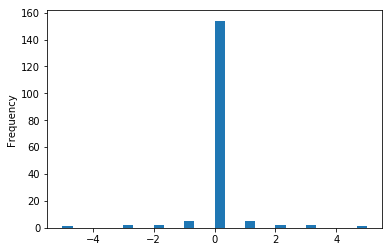

In [574]:
dummies_train_group['difference'].plot.hist(bins = 30)

In [589]:
http_train.packet_len = http_train.packet_len.astype(int)

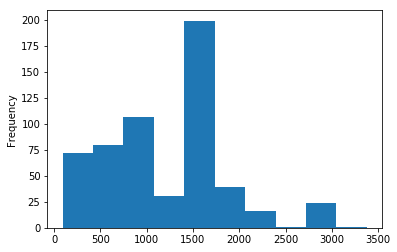

In [590]:
http_train[http_train['HTTPResponse_Request'] == b'200'].packet_len.plot.hist()

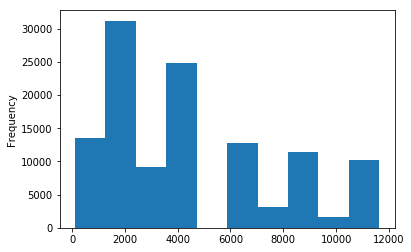

In [607]:
http_f[http_f['HTTPStatus'] == 'response'].packet_len.plot.hist()

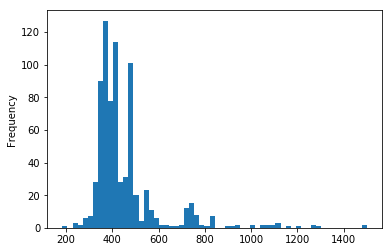

In [620]:
http_train[http_train.HTTPStatus == 'request'].packet_len.plot.hist(bins = 60)

In [624]:
http_f[(http_f.HTTPStatus == 'request')&(http_f.packet_len < 1000)].packet_len.value_counts()

60     95685
475      573
470      561
339      521
647      518
489      502
473      466
484      425
476      416
471      390
491      281
467      281
487      270
899      260
486      241
469      210
464      190
626      187
668      177
474      175
661      147
646      137
410      135
477      134
672      130
654      128
640      119
358      109
633      102
551      102
       ...  
859        1
857        1
793        1
984        1
981        1
963        1
917        1
277        1
788        1
973        1
979        1
977        1
905        1
287        1
927        1
991        1
289        1
801        1
802        1
994        1
974        1
933        1
806        1
966        1
902        1
262        1
809        1
942        1
178        1
959        1
Name: packet_len, Length: 705, dtype: int64

In [113]:
test_df = pd.read_csv("TestData_raw.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


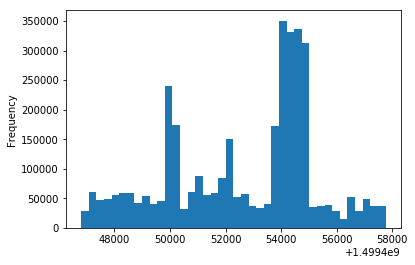

In [116]:
test_df.time_stamp.plot.hist(bins = 40)

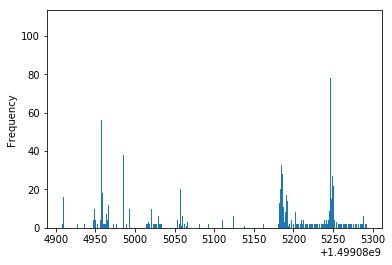

In [131]:
http_train.time_stamp.plot.hist(bins = 500)

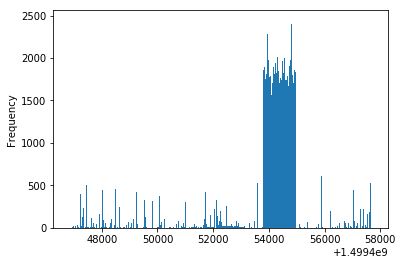

In [134]:
http_f.time_stamp.plot.hist(bins = 1000)

In [136]:
test_df.TCP_flag.value_counts()

A        1858633
PA        526713
S         294333
OTHER     278280
RA        263477
FA        138669
SA        133352
FPA        51195
R          17561
SEC           41
PAC           40
SAE           31
FAN            2
Name: TCP_flag, dtype: int64

# HTTP

In [88]:
import time
timestamp = time.time()
print(timestamp)
local_time = time.localtime(1499446800.014081)
time.strftime('%Y-%m-%d,%H:%M:%S', local_time)

1571037083.7518725


'2017-07-07,17:00:00'

In [85]:
http_f = pd.read_csv("http_test.csv")

In [87]:
http_f.time_stamp.min()

1499446813.956158

In [94]:
start_time = http_f.time_stamp.min() + 7000

In [ ]:
end_time = start_time + 

In [96]:
start_time

1499453813.956158

In [119]:
time.strftime('%Y-%m-%d,%H:%M:%S',time.localtime(http_f.time_stamp.max()))

'2017-07-07,20:02:20'

In [6]:
http_train = pd.read_csv("http_train1.csv")

In [84]:
http_f[http_f.HTTPStatus == 'request'].packet_len.value_counts().head()

60     95685
475      573
470      561
339      521
647      518
Name: packet_len, dtype: int64

In [83]:
http_train[http_train.HTTPStatus == 'request'].packet_len.value_counts().head()

405    88
489    22
366    16
491    15
403    13
Name: packet_len, dtype: int64

In [98]:
http_f[http_f.packet_len == 60].time_stamp.max()

1499454970.6465712

In [99]:
http_f[http_f.packet_len == 60].time_stamp.min()

1499453791.809828

In [101]:
http_f[http_f.packet_len == 60].time_stamp.max() - http_f[http_f.packet_len == 60].time_stamp.min()

1178.8367431163788

In [100]:
time.strftime('%Y-%m-%d,%H:%M:%S',time.localtime(http_f[http_f.packet_len == 60].time_stamp.min()))

'2017-07-07,18:56:31'

In [102]:
time.strftime('%Y-%m-%d,%H:%M:%S',time.localtime(http_f[http_f.packet_len == 60].time_stamp.max()))

'2017-07-07,19:16:10'

In [28]:
http_attacks_ip = http_f[http_f.packet_len == 60].src_ip.unique()

In [52]:
http_f.time_stamp = http_f.time_stamp - http_f.time_stamp.min()

In [108]:
def search_ip(df, ip):
    return df[(df.src_ip == ip)]

In [109]:
http_attacks_ip

array(['13.58.146.190', '13.59.43.55', '104.117.102.33', '146.20.128.189',
       '146.20.128.223', '151.101.192.194', '104.16.26.35',
       '162.242.240.67', '169.54.33.166', '104.97.137.26',
       '107.22.224.100'], dtype=object)

In [110]:
search_ip(http_f,http_attacks_ip[0]).head()

,HTTPResponse_Request,HTTPStatus,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,src_ip,src_port,time_stamp
26885,b'GET',request,2334768577,PA,3988945753,256,192.168.10.50,80,60,13.58.146.190,49533,1.499454e+09
26887,b'GET',request,2057302421,PA,2337542409,256,192.168.10.50,80,60,13.58.146.190,49534,1.499454e+09
26889,b'GET',request,3088742635,PA,2811599939,256,192.168.10.50,80,60,13.58.146.190,49535,1.499454e+09
26891,b'GET',request,4245677735,PA,511452925,256,192.168.10.50,80,60,13.58.146.190,49536,1.499454e+09
26893,b'GET',request,1864884422,PA,3244535701,256,192.168.10.50,80,60,13.58.146.190,49537,1.499454e+09


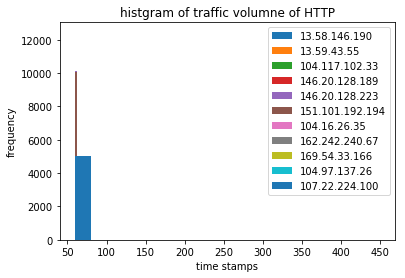

In [112]:
fig, ax = plt.subplots()
for i in range(len(http_attacks_ip)):
    #search_ip(detected_anoma,attack_ips[i]).time_stamp.plot.hist()
    ax.hist(search_ip(http_f,http_attacks_ip[i]).packet_len, label=http_attacks_ip[i], bins = 20)
ax.legend(bbox_to_anchor=(1,1))
plt.title(r'histgram of traffic volumne of HTTP')
plt.xlabel("time stamps")
plt.ylabel("frequency")
plt.savefig("hist of anomaly", pli = 500)

In [80]:
search_ip(http_f,http_attacks_ip[10]).packet_len.value_counts()

60     5000
70       20
114      10
399       1
382       1
449       1
425       1
408       1
Name: packet_len, dtype: int64

In [384]:
http_f = pd.DataFrame(http_f)

In [386]:
http_f.to_csv("http_test.csv", index = False)

In [393]:
http_f.time_stamp = http_f.time_stamp.astype(float)

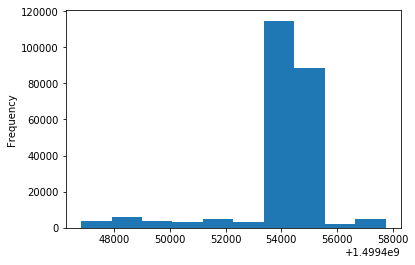

In [394]:
http_f.time_stamp.plot.hist()

In [437]:
http_f['new_time_stamp'] = http_f.time_stamp - http_f.time_stamp.min() 

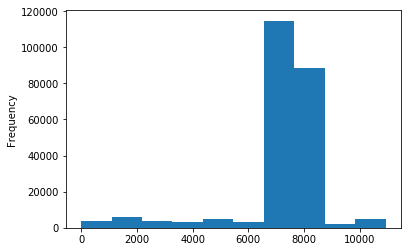

In [438]:
http_f.new_time_stamp.plot.hist()

In [439]:
http_f.new_time_stamp

0             0.000000
1             0.602067
2             0.682616
3             0.729929
4             0.813372
5             1.027013
6             1.313717
7             4.949775
8             4.965823
9             4.967804
10            5.343546
11            5.360102
12            5.387040
13            5.390075
14            5.390327
15            5.390863
16            5.391083
17            5.391670
18            5.405153
19            5.408796
20            5.408988
21            5.409229
22            5.411403
23            5.412203
24            5.412254
25            5.412407
26            5.413754
27            5.415254
28            5.416049
29            5.425175
              ...     
235453    10838.547752
235454    10838.550153
235455    10838.565814
235456    10838.567813
235457    10838.570671
235458    10838.773291
235459    10838.787895
235460    10838.797208
235461    10854.301661
235462    10854.337720
235463    10854.473025
235464    10854.567181
235465    1

In [440]:
http_f.HTTPResponse_Request.value_counts()

b'200'        112869
b'GET'        111460
b'POST'         6116
b'304'          3528
b'302'           938
b'204'           340
b'400'            68
b'301'            58
b'403'            33
b'404'            24
b'408'            19
b'307'             8
b'206'             7
b'503'             6
b'303'             5
b'OPTIONS'         4
Name: HTTPResponse_Request, dtype: int64

In [592]:
http_f = pd.read_csv("http_test.csv")

In [602]:
http_f

,HTTPResponse_Request,HTTPStatus,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,src_ip,src_port,time_stamp
0,b'GET',request,1161921324,PA,150981712,16425,104.18.63.224,80,416,192.168.10.8,5740,1.499447e+09
1,b'301',response,150982088,PA,1161921324,30,192.168.10.8,5740,318,104.18.63.224,80,1.499447e+09
2,b'GET',request,2548781987,PA,3206002859,16425,104.24.25.85,80,353,192.168.10.8,5741,1.499447e+09
3,b'503',response,3206003172,A,2548781987,30,192.168.10.8,5741,1500,104.24.25.85,80,1.499447e+09
4,b'301',response,150982088,PA,1161921324,30,192.168.10.8,5740,318,104.18.63.224,80,1.499447e+09
5,b'GET',request,2618086546,PA,1995207014,16425,104.24.25.85,80,396,192.168.10.8,5742,1.499447e+09
6,b'200',response,1995207370,A,2618086546,30,192.168.10.8,5742,1500,104.24.25.85,80,1.499447e+09
7,b'GET',request,2618093869,PA,1995207370,16425,104.24.25.85,80,551,192.168.10.8,5742,1.499447e+09
8,b'302',response,1995207881,PA,2618093869,31,192.168.10.8,5742,618,104.24.25.85,80,1.499447e+09
9,b'GET',request,2618094447,PA,1995207881,16280,104.24.25.85,80,515,192.168.10.8,5742,1.499447e+09


In [595]:
http_f.packet_len = http_f.packet_len.astype(int)

In [604]:
http_f.time_stamp = http_f.time_stamp - http_f.time_stamp.min()

In [605]:
http_f[http_f['HTTPStatus'] == 'response'][http_f[http_f['HTTPStatus'] == 'response'].packet_len > 6000]

,HTTPResponse_Request,HTTPStatus,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,src_ip,src_port,time_stamp
27283,b'200',response,2704180788,PA,2791770385,229,13.59.43.55,51724,11635,192.168.10.50,80,6989.651610
27289,b'200',response,4281552589,A,891454964,229,13.59.43.55,51726,10260,192.168.10.50,80,6989.652206
27319,b'200',response,3688321451,PA,3132410934,229,13.58.146.190,49752,11635,192.168.10.50,80,6990.310287
27344,b'200',response,1432620088,A,2755738590,229,13.59.43.55,51735,7340,192.168.10.50,80,6990.669988
27348,b'200',response,1325423442,A,1199255598,229,13.59.43.55,51739,7340,192.168.10.50,80,6990.676091
27386,b'200',response,1161173957,A,3756503625,229,13.59.43.55,51744,7340,192.168.10.50,80,6991.652458
27389,b'200',response,3319563317,PA,738724686,229,13.58.146.190,49704,11635,192.168.10.50,80,6991.652736
27437,b'200',response,1156579863,A,3229012573,229,13.58.146.190,49712,7340,192.168.10.50,80,6991.722958
27485,b'200',response,1838530809,PA,1000088822,229,13.59.43.55,51765,11635,192.168.10.50,80,6992.312481
27553,b'200',response,3485102420,PA,902754651,229,13.58.146.190,49788,11635,192.168.10.50,80,6992.773251


In [606]:
http_f.new_time_stamp

AttributeError: 'DataFrame' object has no attribute 'new_time_stamp'

In [500]:
new_http = pd.get_dummies(http_f[['HTTPStatus', 'new_time_stamp']])

In [501]:
round(1.222, 1)

1.2

In [502]:
new_http.new_time_stamp = new_http.new_time_stamp.apply(lambda x:round(x, 0))

In [503]:
sum_ = new_http.groupby(['new_time_stamp']).sum()

In [504]:
sum_['difference'] = sum_['HTTPStatus_request'] - sum_['HTTPStatus_response']

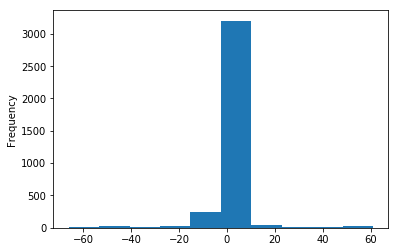

In [505]:
sum_['difference'].plot.hist()

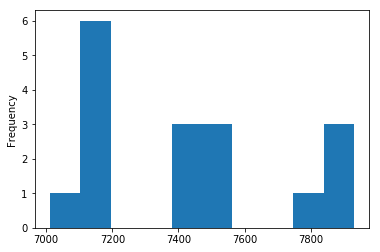

In [510]:
pd.Series(sum_['difference'][sum_['difference'] > 50].index).plot.hist()

In [513]:
http_f.new_time_stamp = http_f.new_time_stamp.astype(int)

In [531]:
http_f[http_f.new_time_stamp.isin(sum_['difference'][sum_['difference'] > 30].index)].src_ip.value_counts()

192.168.10.50      1717
146.20.128.189      327
13.59.43.55         306
169.54.33.166       292
104.16.26.35        243
146.20.128.223      240
104.117.102.33      220
192.168.10.12       169
162.242.240.67      140
107.22.224.100       63
151.101.192.194      52
14.0.67.88           50
61.251.165.12        34
119.205.194.11       32
104.97.137.26        31
61.110.225.154       25
119.205.194.14       20
192.168.10.8         14
172.217.10.110       10
192.168.10.15        10
192.168.10.14         6
72.21.91.29           4
23.61.187.27          3
173.241.242.143       3
72.167.18.239         2
192.168.10.16         2
172.217.10.142        2
192.168.10.19         2
38.72.130.139         2
172.217.12.142        1
192.168.10.5          1
107.21.209.133        1
23.23.158.50          1
172.217.3.98          1
184.84.243.199        1
104.196.63.196        1
54.199.235.3          1
178.255.83.1          1
23.194.140.159        1
178.124.129.12        1
185.167.164.39        1
216.200.232.14  

In [499]:
sum_['difference'][sum_['difference'] > 250]

new_time_stamp
0.6        255
0.8        255
1.3        255
5.3        255
5.5        254
6.6        255
6.7        255
10.5       254
15.5       255
35.6       255
139.5      255
172.5      255
172.9      255
173.6      255
250.4      251
251.6      255
258.8      255
262.3      255
262.7      255
295.8      255
326.8      254
327.3      255
327.8      254
329.0      254
329.2      255
330.4      255
345.3      255
346.8      255
350.2      255
361.3      255
          ... 
10829.7    254
10830.1    255
10830.3    253
10830.4    253
10830.5    255
10830.9    254
10831.3    254
10831.4    255
10831.7    253
10831.8    254
10831.9    253
10832.3    255
10833.2    255
10833.3    254
10834.4    255
10834.5    255
10834.9    255
10835.3    255
10836.1    255
10836.9    254
10837.2    255
10837.3    255
10837.6    255
10838.1    255
10838.5    255
10838.8    253
10854.7    255
10855.5    255
10876.4    255
10926.6    255
Name: difference, Length: 4079, dtype: uint8

In [375]:
len(http_f['HTTPRequest'])

117580

In [376]:
len(http_f['HTTPResponse'])

117903

In [371]:
http_f.to_csv("http_test.csv")

{'HTTPRequest': [b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'GET',
  b'POST',
  b'POST',
  b'POST',
  b'POST',
  b'POST',
  b'POST',
  b'POST',
  b'GET',
  b'GET',
  b'POST',
  b'POST',
  b'POST',
  b'POST',
  b'

In [271]:
a = 0
b = 0
for index,pkt in enumerate(PcapReader('day2_5.pcap')):
        #print(pkt.sprintf("%IP.len%"))
    if IP in pkt:
        features["time_stamp"].append(pkt.time)
        features['src_ip'].append(pkt[IP].src)
        features['dst_ip'].append(pkt[IP].dst)
        features['packet_len'].append(pkt.sprintf("%IP.len%"))
        if TCP in pkt:
            features['protocol'].append('TCP')
            features['TCP_seq'].append(pkt.getlayer(TCP).seq)
            features['TCP_window'].append(pkt.getlayer(TCP).window)
            features['TCP_ack'].append(pkt.getlayer(TCP).ack)
            features['src_port'].append(pkt[TCP].sport)
            features['dst_port'].append(pkt[TCP].dport)
            features['TCP_flag'].append(pkt.sprintf('%TCP.flags%'))
        elif UDP in pkt:
            features['protocol'].append('UDP')
            features['TCP_seq'].append('OTHER')
            features['TCP_window'].append('OTHER')
            features['TCP_ack'].append('OTHER')
            features['src_port'].append(pkt[UDP].sport)
            features['dst_port'].append(pkt[UDP].dport)
            features['TCP_flag'].append('OTHER')
        elif ICMP in pkt:
            features['TCP_seq'].append('OTHER')
            features['TCP_window'].append('OTHER')
            features['TCP_ack'].append('OTHER')
            features['protocol'].append('ICMP')
            features['src_port'].append('OTHER')
            features['dst_port'].append('OTHER')
            features['TCP_flag'].append('OTHER')
        else:
            features['TCP_seq'].append('OTHER')
            features['TCP_window'].append('OTHER')
            features['TCP_ack'].append('OTHER')
            features['protocol'].append('OTHER')
            features['TCP_flag'].append('OTHER')
            features['src_port'].append('OTHER')
            features['dst_port'].append('OTHER')

In [272]:
day_2_df = pd.DataFrame(features)
day_2_df.time_stamp = day_2_df.time_stamp.astype(np.float64)
#create this new feature to make it easy to group
day_2_df['src_to_dst_ip'] = day_2_df.src_ip +"->"+ day_2_df.dst_ip
# the standard deviation of time stamp between the messages between the same src_ip and dst_ip 
map_ = day_2_df.groupby(['src_to_dst_ip'])['time_stamp'].std()
day_2_df['time_std'] = day_2_df['src_to_dst_ip'].map(map_)
day_2_df.head()

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std
0,2633305935,A,3139966821,1355,13.107.4.50,80,40,TCP,192.168.10.15,49647,1.499086e+09,192.168.10.15->13.107.4.50,34.046562
1,3139966821,A,2633304475,1026,192.168.10.15,49647,1500,TCP,13.107.4.50,80,1.499086e+09,13.107.4.50->192.168.10.15,34.064540
2,OTHER,OTHER,OTHER,OTHER,192.168.10.50,123,76,UDP,67.215.197.149,123,1.499086e+09,67.215.197.149->192.168.10.50,68.000028
3,3139966821,A,2633305935,1026,192.168.10.15,49647,2960,TCP,13.107.4.50,80,1.499086e+09,13.107.4.50->192.168.10.15,34.064540
4,2633308855,A,3139966821,1361,13.107.4.50,80,40,TCP,192.168.10.15,49647,1.499086e+09,192.168.10.15->13.107.4.50,34.046562


In [273]:
#calculate the time interval between this message and its preceeding message between the same src_ip and dst_ip
for i in day_2_df['src_to_dst_ip'].value_counts().index:
    day_2_df.loc[day_2_df['src_to_dst_ip'] == i, 'time_interval'] = day_2_df[day_2_df['src_to_dst_ip'] == i].time_stamp.diff()

In [274]:
gc.collect()

12920

In [275]:
X = day_2_df

In [276]:
X.to_csv("Day2_5_raw.csv", index = False)

In [198]:
X.loc[X.src_port == 'OTHER', 'src_port'] = -1
X.loc[X.dst_port == 'OTHER', 'dst_port'] = -1

/usr/lib/python3/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [199]:
X['src_port'] = X['src_port'].astype(int)
X['dst_port'] = X['dst_port'].astype(int)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [200]:
# handel ip addresses 
# 1: internal ip
# 0: external ip
def search_ip_type(ip):
    ip_ = ip.split(".")
    if ip_[0] == '192' and ip_[1] == '168' and ip_[2] == '10':
        return 1
    return 0
X.dst_ip = X.dst_ip.apply(lambda x : search_ip_type(x))
X.src_ip = X.src_ip.apply(lambda x : search_ip_type(x))

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [201]:
X.head()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
0,0,A,TCP,1,4.82051,43060,443,828.794579
1,1,A,TCP,0,4.82051,80,55848,1771.272143
2,1,A,TCP,0,4.82051,443,43060,824.949176
3,1,PA,TCP,0,4.82051,443,59225,3158.862252
4,0,A,TCP,1,4.82051,59225,443,3159.276100


In [202]:
# hanlde protocol: arbitrary encoding to decrease the dimension

print(X.protocol.value_counts())
X_encode = X.protocol.value_counts().reset_index()
X_encode['encode'] = range(X_encode.shape[0])

map_protocol = X_encode.set_index('index')['encode'] + 1
X.protocol = X.protocol.map(map_protocol)

TCP      3284047
UDP       277168
ICMP         906
OTHER        206
Name: protocol, dtype: int64


/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [203]:
# handle flag: arbitrary encoding to decrease the dimension
print(X.flag.value_counts())
flag_map = {
    "S":1,
    "SA":2,
    "A":3
}
def flag_map_(x):
    if x in flag_map:
        return flag_map[x]
    else:
        return 4
X.flag = X.flag.apply(lambda x : flag_map_(x))

A        1858633
PA        526713
S         294333
OTHER     278280
RA        263477
FA        138669
SA        133352
FPA        51195
R          17561
SEC           41
PAC           40
SAE           31
FAN            2
Name: flag, dtype: int64


/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [204]:
# handle src_port and dst_port : frequency encoding
src_port_map = X.src_port.value_counts()
dst_port_map = X.dst_port.value_counts()
X.src_port = X.src_port.map(src_port_map)
X.dst_port = X.dst_port.map(dst_port_map)

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [295]:
X

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std,dst_ip_internal
0,192.168.10.14,A,TCP,13.107.4.50,0.213304,80,51197,8.627729,1
1,13.107.4.50,A,TCP,192.168.10.14,0.213304,51197,80,11.222483,0
2,192.168.10.14,A,TCP,13.107.4.50,0.000192,80,51197,8.627729,1
3,13.107.4.50,A,TCP,192.168.10.14,0.000330,51197,80,11.222483,0
4,192.168.10.14,A,TCP,13.107.4.50,0.000193,80,51197,8.627729,1
5,192.168.10.14,A,TCP,13.107.4.50,0.000191,80,51197,8.627729,1
6,192.168.10.14,A,TCP,13.107.4.50,0.000192,80,51197,8.627729,1
7,13.107.4.50,A,TCP,192.168.10.14,0.000502,51197,80,11.222483,0
8,192.168.10.14,A,TCP,13.107.4.50,0.000192,80,51197,8.627729,1
9,192.168.10.14,A,TCP,13.107.4.50,0.000192,80,51197,8.627729,1


In [206]:
X.fillna(X.mean(), inplace = True)

/usr/lib/python3/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [207]:
X.isnull().any().any()

False

In [208]:
X.to_csv("TestData_processed.csv", index = False)

In [210]:
X_test = X

In [211]:
X_test

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
0,0,3,1,1,4.820510e+00,27,554983,828.794579
1,1,3,1,0,4.820510e+00,720727,91,1771.272143
2,1,3,1,0,4.820510e+00,642259,22,824.949176
3,1,4,1,0,4.820510e+00,642259,36,3158.862252
4,0,3,1,1,4.820510e+00,48,554983,3159.276100
5,0,4,1,1,9.337902e-03,48,554983,3159.276100
6,0,3,1,1,4.820510e+00,20,554983,13.768338
7,1,3,1,0,4.820510e+00,642259,16,14.503731
8,0,4,1,1,4.820510e+00,161,554983,4148.027463
9,1,3,1,0,1.045210e-01,642259,36,3158.862252


In [2]:
import pandas as pd
import numpy as np
X_total = pd.read_csv("day2_1_processed.csv").reset_index(drop = True)

In [2]:
X = X_total.sample(frac = 0.01)

In [91]:
X.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [18]:
X.reset_index(drop = True, inplace = True)

In [19]:
X

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
0,0,3,1,1,0.000178,194578,300078,48.734366
1,1,4,1,0,0.000192,390646,259137,48.420823
2,1,4,2,1,0.001191,6393,11,89.002196
3,1,4,1,0,0.000193,390646,259137,48.420823
4,1,3,1,0,0.000193,390646,1122,3.639157
5,1,3,1,0,0.000227,390646,259137,48.420823
6,1,3,1,0,0.000192,390646,259137,48.420823
7,1,3,1,0,0.000458,390646,259137,48.420823
8,1,3,1,0,0.000191,390646,100985,8.627729
9,1,3,1,0,0.000193,390646,259137,48.420823


# DBSCAN ： V1

In [3]:
#the min_samples can be used to mitigate the effects of curse of high dimensionality in distance based clustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X_Scaled = StandardScaler().fit_transform(X)
clustering = DBSCAN(eps=5, min_samples=16).fit(X_Scaled)


In [5]:
clustering

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=16, n_jobs=None, p=None)

In [9]:
cluster_labels = pd.Series(clustering.labels_)

In [ ]:
cluster_labels.value_counts()

In [34]:
X[cluster_labels == 1].protocol.value_counts()

2    162
Name: protocol, dtype: int64

In [37]:
cluster_cores = pd.Series(clustering.core_sample_indices_)

In [40]:
#percentgate of cores
cluster_cores.shape[0]/X.shape[0]

0.9971181556195965

# DBSCAN：V2

In [42]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X_Scaled = StandardScaler().fit_transform(X)
clustering = DBSCAN(eps=3, min_samples=16).fit(X_Scaled)

In [43]:
cluster_labels = pd.Series(clustering.labels_)

In [44]:
cluster_labels.value_counts()

 0    7292
 1     442
 2     161
 4      31
 3      28
-1      27
dtype: int64

In [180]:
X[cluster_labels == 3]

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
15,0,1,1,1,2.843917,5,42192,4.101985
30,0,1,1,1,0.000044,7,42192,26.759172
63,0,1,1,1,0.000100,14,300078,1.971873
207,0,1,1,1,0.300493,1,42192,0.369662
333,0,1,1,1,0.000489,9,42192,26.759172
352,0,1,1,1,0.006752,72,42192,26.759172
422,0,1,1,1,0.000259,9,42192,26.759172
659,0,1,1,1,0.005203,22,42192,45.179850
770,0,1,1,1,0.000071,7,42192,26.759172
1016,0,1,1,1,0.213304,23,300078,110.245203


In [83]:
cluster_cores = pd.Series(clustering.core_sample_indices_)

In [84]:
cluster_cores.shape[0]/X.shape[0]

0.9937351209121664

In [85]:
cluster_cores

0          0
1          1
2          2
3          3
4          4
5          5
6          6
7          7
8          8
9          9
10        10
11        11
12        12
13        13
14        14
15        15
16        16
17        17
18        18
19        19
20        20
21        21
22        22
23        23
24        24
25        25
26        26
27        27
28        28
29        29
        ... 
7901    7951
7902    7952
7903    7953
7904    7954
7905    7955
7906    7956
7907    7957
7908    7958
7909    7959
7910    7960
7911    7961
7912    7962
7913    7963
7914    7964
7915    7965
7916    7966
7917    7967
7918    7968
7919    7969
7920    7970
7921    7971
7922    7972
7923    7973
7924    7974
7925    7975
7926    7976
7927    7977
7928    7978
7929    7979
7930    7980
Length: 7931, dtype: int64

# K-means  ： V1

In [92]:
X_total.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [94]:
X_total.head()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
0,1,3,1,0,0.213304,390646,100985,8.627729
1,0,3,1,1,0.213304,80088,300078,11.222483
2,1,3,1,0,0.000192,390646,100985,8.627729
3,0,3,1,1,0.000330,80088,300078,11.222483
4,1,3,1,0,0.000193,390646,100985,8.627729


In [97]:
X_total.shape

(798056, 8)

In [119]:
from sklearn.cluster import KMeans
X_Scaled = StandardScaler().fit_transform(X_total)
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_Scaled)
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [120]:
kmeans_label = pd.Series(kmeans.labels_)

In [123]:
#cluser 2: From the result we can see that it is majorily clustered by the type of ip, both clusters are of compariable
#shape, one cluster is dst_ip == 1 and src_ip == 0, the other is src_ip == 1 and dst_ip == 1, now we change the number of
#clusters
X_total[kmeans_label == 1]

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
1,0,3,1,1,0.213304,80088,300078,11.222483
3,0,3,1,1,0.000330,80088,300078,11.222483
7,0,3,1,1,0.000502,80088,300078,11.222483
11,0,3,1,1,0.000504,80088,300078,11.222483
14,0,3,1,1,0.000499,80088,300078,11.222483
18,0,3,1,1,0.000509,80088,300078,11.222483
21,0,3,1,1,0.000490,80088,300078,11.222483
23,0,3,1,1,0.000237,80088,300078,11.222483
26,0,3,1,1,0.000307,80088,300078,11.222483
28,0,3,1,1,0.000188,80088,300078,11.222483


In [126]:
X_total[kmeans_label == 1].src_ip.value_counts()

1    361992
0       348
Name: src_ip, dtype: int64

# K-means ： V2

In [167]:
from sklearn.cluster import KMeans
X_Scaled = StandardScaler().fit_transform(X_total)
kmeans = KMeans(n_clusters=5).fit(X_Scaled)
kmeans_label = pd.Series(kmeans.labels_)

In [169]:
kmeans_label.value_counts()

0    343487
2    262392
1    173493
3     16871
4      1813
dtype: int64

In [181]:
X_total[kmeans_label == 3]

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
1522,0,4,2,1,2.133041e-01,937,937,124.543024
1523,0,4,2,1,2.133041e-01,937,937,135.046101
1525,0,4,2,1,2.133041e-01,937,937,129.197529
1526,0,4,2,1,2.133041e-01,937,937,128.029916
1527,0,4,2,1,2.133041e-01,937,937,122.627306
1528,0,4,2,1,2.133041e-01,937,937,123.460744
1732,1,4,2,0,2.133041e-01,937,937,135.045970
1781,1,4,2,0,2.133041e-01,937,937,122.625163
1789,1,4,2,0,2.133041e-01,937,937,128.027886
1794,1,4,2,0,2.133041e-01,937,937,124.542883


In [183]:
#https://www.sciencedirect.com/science/article/pii/S0031320319301608
#However, when the data has well separated clusters, the performance of k-means depends 
#completely on the goodness of the initialization. Therefore, if high clustering accuracy
#is needed, a better algorithm should be used instead.

# OCSVM

In [136]:
#characteristic : time interval of the class labled 1
#is very small, the mean is about 0.002574, the other class
#labeled -1, its mean of time interval is about 0.43
#the average time interval is about 0.2054
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(nu=0.1, kernel="rbf", gamma=1)

In [137]:
X_sampled = X_total.sample(frac = 0.1).reset_index(drop = True)

In [138]:
X_sampled.time_interval.mean()

0.22264043145945897

In [139]:
X_sampled.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [140]:
ocsvm_ = ocsvm.fit(X_sampled)

In [141]:
pred_ocsvm = pd.Series(ocsvm_.predict(X_sampled))

In [142]:
X_sampled[pred_ocsvm == 1].describe()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
count,70273.000000,70273.000000,70273.000000,70273.000000,70273.000000,70273.000000,70273.000000,70273.000000
mean,0.571414,3.030538,1.012323,0.440084,0.001344,274840.073812,233362.028845,37.117974
std,0.494877,0.198987,0.110325,0.496401,0.015728,134532.305965,92392.371550,19.348929
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.037506
25%,0.000000,3.000000,1.000000,0.000000,0.000192,194578.000000,259137.000000,11.222483
50%,1.000000,3.000000,1.000000,0.000000,0.000196,390646.000000,259137.000000,48.420823
75%,1.000000,3.000000,1.000000,1.000000,0.000267,390646.000000,300078.000000,48.734366
max,1.000000,4.000000,2.000000,1.000000,0.802628,390646.000000,300078.000000,115.755106


In [145]:
X_sampled[pred_ocsvm == -1].describe()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
count,9533.000000,9533.000000,9533.000000,9533.000000,9.533000e+03,9533.000000,9533.000000,9533.000000
mean,0.543795,3.318892,1.095668,0.566034,1.853935e+00,57986.191755,55442.756740,32.447641
std,0.498104,0.627440,0.303627,0.495646,9.610741e+00,117633.937067,100569.830629,33.769211
min,0.000000,1.000000,1.000000,0.000000,-9.536743e-07,1.000000,1.000000,0.000002
25%,0.000000,3.000000,1.000000,0.000000,1.471043e-04,35.000000,38.000000,5.418950
50%,1.000000,3.000000,1.000000,1.000000,2.908707e-04,4067.000000,4440.000000,21.288746
75%,1.000000,4.000000,1.000000,1.000000,3.904986e-02,44702.000000,42192.000000,48.652950
max,1.000000,4.000000,4.000000,1.000000,2.501016e+02,390646.000000,300078.000000,184.554986


# Isolation Tree

In [162]:
#has simmilar but more significant result than ovsvm, but the result is still based on the 
#time interval in the sense that the anomoly instance has much bigger time_interval which is
#not desired, since the attack tends to have much smaller time interval, indicates our features
#may have some problem
from sklearn.ensemble import IsolationForest
IF = IsolationForest(behaviour='new',contamination=0.01,random_state=42)

In [163]:
IF_ = IF.fit(X_sampled)

In [164]:
IF_result = pd.Series(IF_.predict(X_sampled))

In [165]:
X_sampled[IF_result == -1].describe()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,0.689612,3.619524,1.594493,0.754693,16.823301,31115.633292,26308.010013,90.503576
std,0.462942,0.749549,0.498891,0.430538,28.328591,90895.806708,70269.702737,34.889393
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.045219
25%,0.000000,3.000000,1.000000,1.000000,0.213304,15.000000,14.000000,71.208025
50%,1.000000,4.000000,2.000000,1.000000,2.280038,937.000000,937.000000,103.791631
75%,1.000000,4.000000,2.000000,1.000000,20.011261,6393.000000,7177.000000,115.657001
max,1.000000,4.000000,3.000000,1.000000,250.101648,390646.000000,300078.000000,184.554986


In [166]:
X_sampled[IF_result == 1].describe()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
count,79007.000000,79007.000000,79007.000000,79007.000000,7.900700e+04,79007.000000,79007.000000,79007.000000
mean,0.566886,3.059374,1.016492,0.452099,5.475749e-02,251139.234270,213988.197919,36.014560
std,0.495509,0.287635,0.129723,0.497703,7.667180e-01,148982.902832,108506.858688,20.757496
min,0.000000,1.000000,1.000000,0.000000,-9.536743e-07,1.000000,1.000000,0.000002
25%,0.000000,3.000000,1.000000,0.000000,1.919270e-04,80088.000000,100985.000000,11.222483
50%,1.000000,3.000000,1.000000,0.000000,2.000332e-04,194578.000000,259137.000000,48.420823
75%,1.000000,3.000000,1.000000,1.000000,2.880096e-04,390646.000000,300078.000000,48.734366
max,1.000000,4.000000,4.000000,1.000000,4.502244e+01,390646.000000,300078.000000,157.868534


# LocalOutlierFactor

In [180]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
lof = LocalOutlierFactor(n_neighbors=35, contamination=0.01)

In [181]:
X_Scaled_sampled = StandardScaler().fit_transform(X_sampled)

In [182]:
lof_pred = pd.Series(lof.fit_predict(X_Scaled_sampled))

In [185]:
X_sampled[lof_pred == -1].describe()

,dst_ip,flag,protocol,src_ip,time_interval,src_port,dst_port,time_std
count,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000,796.000000
mean,0.631910,3.082915,1.092965,0.451005,0.028870,240408.697236,163158.178392,33.494913
std,0.482589,0.443723,0.338551,0.497907,0.195471,164389.593588,133492.099107,22.925749
min,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,2.000000,1.100662
25%,0.000000,3.000000,1.000000,0.000000,0.000178,80088.000000,7177.000000,11.222483
50%,1.000000,3.000000,1.000000,0.000000,0.000212,390646.000000,259137.000000,48.420823
75%,1.000000,3.000000,1.000000,1.000000,0.000299,390646.000000,300078.000000,48.420823
max,1.000000,4.000000,4.000000,1.000000,2.900187,390646.000000,300078.000000,91.975431


# Multi Gaussian Distribution

In [2]:
from scapy.all import *
import os
import gc
print(os.sys.path)

from scapy.layers.http import *

import pandas as pd
import numpy as np

['', '/usr/lib/python36.zip', '/usr/lib/python3.6', '/usr/lib/python3.6/lib-dynload', '/home/ubuntu/.local/lib/python3.6/site-packages', '/usr/local/lib/python3.6/dist-packages', '/usr/lib/python3/dist-packages', '/usr/lib/python3/dist-packages/IPython/extensions', '/home/ubuntu/.ipython']


In [3]:
#del X_train
#del X_test

#X_train_1 = pd.read_csv("Day2_1_raw.csv")
#X_train_2 = pd.read_csv("Day2_2_raw.csv")
#X_train_3 = pd.read_csv("Day2_3_raw.csv")
#X_train_4 = pd.read_csv("Day2_4_raw.csv")
#X_train_5 = pd.read_csv("Day2_5_raw.csv")

X_test = pd.read_csv("TestData_raw.csv")
X_train = pd.read_csv("combined_X_train.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
#X_train = pd.concat([X_train_1, X_train_2, X_train_3, X_train_4, X_train_5], axis = 0).reset_index(drop = True)

In [15]:
#X_train.to_csv("combined_X_train.csv", index = False)

In [21]:
X_train[X_train.dst_port == X_train.src_port].protocol.value_counts()

UDP      12131
ICMP       472
OTHER       87
Name: protocol, dtype: int64

In [4]:
X_train.time_stamp = X_train.time_stamp - X_train.time_stamp.min()
X_train.time_stamp = X_train.time_stamp.astype(int)
X_test.time_stamp = X_test.time_stamp - X_test.time_stamp.min()
X_test.time_stamp = X_test.time_stamp.astype(int)

In [5]:
#time interval in train
X_train.time_stamp.max() - X_train.time_stamp.min()

3012

In [6]:
#packets per seconds in train
X_train.shape[0]/(X_train.time_stamp.max() - X_train.time_stamp.min())

1589.2938247011953

In [7]:
##time interval in test
X_test.time_stamp.max() - X_test.time_stamp.min()

10961

In [8]:
##packets per seconds in test
X_test.shape[0]/(X_test.time_stamp.max() - X_test.time_stamp.min())

325.00018246510353

In [9]:
#handle the type of ip: public ip or private ip
def search_ip_type(ip):
# 1:private ip
# 0:public ip
    ip_ = ip.split(".")
    if ip_[0] == '192' and ip_[1] == '168' and ip_[2] == '10':
        return 1
    return 0

def get_internal_ip(df):
    
    df['dst_ip_internal'] = df.dst_ip.apply(lambda x : search_ip_type(x))
    df['src_ip_internal'] = df.src_ip.apply(lambda x : search_ip_type(x))

get_internal_ip(X_test)
get_internal_ip(X_train)

In [10]:
print("shape of train: ",X_train.shape)
print("shape of test: ",X_test.shape)

shape of train:  (4786953, 16)
shape of test:  (3562327, 16)


In [11]:
X_test.time_stamp.iloc[0]

0

In [12]:
def handle_OTHER(x):
    if x == "OTHER":
        return -1
    else: return int(x)

X_test.dst_port = X_test.dst_port.apply(lambda x:handle_OTHER(x))
X_test.src_port = X_test.dst_port.apply(lambda x:handle_OTHER(x))
X_train.dst_port = X_train.dst_port.apply(lambda x:handle_OTHER(x))
X_train.src_port = X_train.src_port.apply(lambda x:handle_OTHER(x))

In [13]:
X_train.dst_port.value_counts().head()

80       1709888
49647    1655638
443       322484
50098     306076
51197     100992
Name: dst_port, dtype: int64

In [14]:
X_train_ = X_train[['TCP_flag', 'time_stamp']]
X_test_ = X_test[['TCP_flag', 'time_stamp']]

In [15]:
#X_test_.protocol.value_counts()

# features: count of S - SA, count of public src_ip, count of private src_ip

In [16]:
#these ports are common in normal day
port_dict = { 
        80:"HTTP",
        443:"HTTPS",
        22:"SSH",
        53:"DNS",
    }

#these flag are we especially care about, since the distribution of S and SA are significantly different in normal and
#attack day

TCP_flag_dict = {
        "A":"A",
        "SA":"SA",
        "S":"S"
    }

#handle port and flag
#X_test_.dst_port = X_test_.dst_port.map(port_dict)
#X_test_.src_port = X_test_.src_port.map(port_dict)
#X_train.dst_port = X_train.dst_port.map(port_dict)
#X_train.src_port = X_train.src_port.map(port_dict)

X_test_.TCP_flag = X_test_.TCP_flag.map(TCP_flag_dict)
X_train_.TCP_flag = X_train_.TCP_flag.map(TCP_flag_dict)

#X_train.dst_port.fillna("OTHER", inplace = True)
#X_test_.dst_port.fillna("OTHER", inplace = True)
#X_train.src_port.fillna("OTHER", inplace = True)
#X_test_.src_port.fillna("OTHER", inplace = True)

X_train_.TCP_flag.fillna("OTHER", inplace = True)
X_test_.TCP_flag.fillna("OTHER", inplace = True)

#X_train.TCP_ack = X_train.TCP_ack.apply(lambda x : -1 if x == 'OTHER' else x)
#X_test.TCP_ack = X_test.TCP_ack.apply(lambda x : -1 if x == 'OTHER' else x)
#X_train.TCP_seq = X_train.TCP_seq.apply(lambda x : -1 if x == 'OTHER' else x)
#X_test.TCP_seq = X_test.TCP_seq.apply(lambda x : -1 if x == 'OTHER' else x)
#X_train.TCP_window = X_train.TCP_window.apply(lambda x : -1 if x == 'OTHER' else x)
#X_test.TCP_window = X_test.TCP_window.apply(lambda x : -1 if x == 'OTHER' else x)
"""
X_train.time_std.fillna(-1, inplace = True)
X_test.time_std.fillna(-1, inplace = True)
X_train.time_interval.fillna(-1, inplace = True)
X_test.time_interval.fillna(-1, inplace = True)
X_train.dst_port.fillna(-1, inplace = True)
X_test.dst_port.fillna(-1, inplace = True)
X_train.src_port.fillna(-1, inplace = True)
X_test.src_port.fillna(-1, inplace = True)

def convert_type(X_train):
    X_train.TCP_ack = X_train.TCP_ack.astype(int)
    X_train.TCP_seq = X_train.TCP_seq.astype(int)
    X_train.TCP_window = X_train.TCP_window.astype(int)
    #X_train.src_port = X_train.src_port.astype(int)
    #X_train.dst_port = X_train.dst_port.astype(int)
    X_train.time_std = X_train.time_std.astype(np.float64)
    X_train.time_interval = X_train.time_interval.astype(np.float64)
    X_train.packet_len = X_train.packet_len.astype(int)
    X_train.time_stamp = X_train.time_stamp.astype(np.float64)

convert_type(X_train)
convert_type(X_test)

X_train_dummies = pd.get_dummies(X_train)
X_test_dummies = pd.get_dummies(X_test)

print("dummies shape: ",X_train_dummies.shape, X_test_dummies.shape)
"""

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/usr/lib/python3/dist-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


'\nX_train.time_std.fillna(-1, inplace = True)\nX_test.time_std.fillna(-1, inplace = True)\nX_train.time_interval.fillna(-1, inplace = True)\nX_test.time_interval.fillna(-1, inplace = True)\nX_train.dst_port.fillna(-1, inplace = True)\nX_test.dst_port.fillna(-1, inplace = True)\nX_train.src_port.fillna(-1, inplace = True)\nX_test.src_port.fillna(-1, inplace = True)\n\ndef convert_type(X_train):\n    X_train.TCP_ack = X_train.TCP_ack.astype(int)\n    X_train.TCP_seq = X_train.TCP_seq.astype(int)\n    X_train.TCP_window = X_train.TCP_window.astype(int)\n    #X_train.src_port = X_train.src_port.astype(int)\n    #X_train.dst_port = X_train.dst_port.astype(int)\n    X_train.time_std = X_train.time_std.astype(np.float64)\n    X_train.time_interval = X_train.time_interval.astype(np.float64)\n    X_train.packet_len = X_train.packet_len.astype(int)\n    X_train.time_stamp = X_train.time_stamp.astype(np.float64)\n\nconvert_type(X_train)\nconvert_type(X_test)\n\nX_train_dummies = pd.get_dummies(X

In [244]:
X_test = pd.read_csv("TestData_raw.csv")

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Left There!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

In [245]:
X_test.time_stamp = X_test.time_stamp

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval
0,1937005088,A,2079117325,341,172.217.10.34,443,52,TCP,192.168.10.17,43060,1.499447e+09,192.168.10.17->172.217.10.34,828.794579,NaN
1,1740247975,A,3030384669,399,192.168.10.17,55848,52,TCP,172.217.10.46,80,1.499447e+09,172.217.10.46->192.168.10.17,1771.272143,NaN
2,2079117326,A,1937005088,391,192.168.10.17,43060,52,TCP,172.217.10.34,443,1.499447e+09,172.217.10.34->192.168.10.17,824.949176,NaN
3,1018822505,PA,496402744,243,192.168.10.51,59225,143,TCP,162.213.33.50,443,1.499447e+09,162.213.33.50->192.168.10.51,3158.862252,NaN
4,496402835,A,1018822505,282,162.213.33.50,443,52,TCP,192.168.10.51,59225,1.499447e+09,192.168.10.51->162.213.33.50,3159.276100,NaN
5,496402835,PA,1018822505,282,162.213.33.50,443,249,TCP,192.168.10.51,59225,1.499447e+09,192.168.10.51->162.213.33.50,3159.276100,9.337902e-03
6,1527433669,A,785729593,379,151.101.118.2,443,52,TCP,192.168.10.19,42918,1.499447e+09,192.168.10.19->151.101.118.2,13.768338,NaN
7,785729594,A,1527433669,61,192.168.10.19,42918,52,TCP,151.101.118.2,443,1.499447e+09,151.101.118.2->192.168.10.19,14.503731,NaN
8,700141264,PA,1312426727,336,172.217.10.130,443,534,TCP,192.168.10.16,38518,1.499447e+09,192.168.10.16->172.217.10.130,4148.027463,NaN
9,1018822702,A,496402835,252,192.168.10.51,59225,52,TCP,162.213.33.50,443,1.499447e+09,162.213.33.50->192.168.10.51,3158.862252,1.045210e-01


In [17]:
X_test_dummies = pd.get_dummies(X_test_)
X_train_dummies = pd.get_dummies(X_train_)

In [18]:
#now time stamp has converted to int
X_test_dummies.head().time_stamp

0    0
1    0
2    0
3    0
4    0
Name: time_stamp, dtype: int64

In [19]:
#print('pkts per second in train:', X_train_dummies.time_stamp.value_counts().mean())
print('pkts per second in test:', X_test_dummies.time_stamp.value_counts().mean())

pkts per second in test: 331.0405166806059


In [20]:
X_test_dummies['count'] = np.ones(X_test_dummies.shape[0])
X_train_dummies['count'] = np.ones(X_train_dummies.shape[0])

In [21]:
X_train_dummies

,time_stamp,TCP_flag_A,TCP_flag_OTHER,TCP_flag_S,TCP_flag_SA,count
0,0,1,0,0,0,1.0
1,0,1,0,0,0,1.0
2,0,1,0,0,0,1.0
3,0,1,0,0,0,1.0
4,0,1,0,0,0,1.0
5,0,1,0,0,0,1.0
6,0,1,0,0,0,1.0
7,0,1,0,0,0,1.0
8,0,1,0,0,0,1.0
9,0,1,0,0,0,1.0


In [22]:
time_aggre_train = X_train_dummies.groupby(X_train_dummies.time_stamp).sum()
time_aggre_test = X_test_dummies.groupby(X_test_dummies.time_stamp).sum()

In [34]:
time_aggre_test['S_A'] = time_aggre_test.TCP_flag_S - time_aggre_test.TCP_flag_SA
time_aggre_train['S_A'] = time_aggre_train.TCP_flag_S - time_aggre_train.TCP_flag_SA

In [35]:
time_aggre_test['S_A_ratio'] = time_aggre_test['S_A']/time_aggre_test['count']
time_aggre_train['S_A_ratio'] = time_aggre_train['S_A']/time_aggre_train['count']

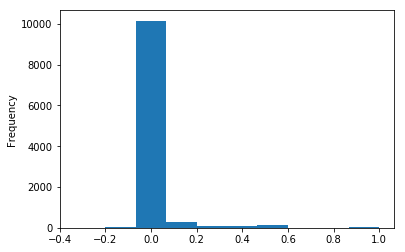

In [36]:
time_aggre_test['S_A_ratio'].plot.hist()

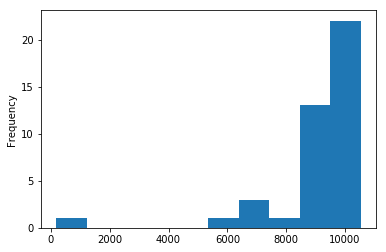

In [26]:
pd.Series(time_aggre_test[time_aggre_test['S_A_ratio'] > 0.8].index).plot.hist()

In [37]:
time_aggre_test.describe()

,TCP_flag_A,TCP_flag_OTHER,TCP_flag_S,TCP_flag_SA,count,S_A,S_A_ratio
count,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000,10761.000000
mean,172.719357,118.577177,27.351826,12.392157,331.040517,14.959669,0.018606
std,349.231940,222.527136,122.862165,32.623499,609.194812,118.775295,0.091748
min,0.000000,0.000000,0.000000,0.000000,1.000000,-24.000000,-0.333333
25%,15.000000,7.000000,0.000000,0.000000,27.000000,0.000000,0.000000
50%,36.000000,25.000000,1.000000,0.000000,64.000000,0.000000,0.000000
75%,114.000000,111.000000,6.000000,5.000000,262.000000,0.000000,0.000000
max,4483.000000,1800.000000,1063.000000,270.000000,4934.000000,999.000000,1.000000


In [40]:
X_test_final = time_aggre_test[['count', 'S_A']]
X_train_final = time_aggre_train[['count', 'S_A']]

In [38]:
time_aggre_train.describe()

,TCP_flag_A,TCP_flag_OTHER,TCP_flag_S,TCP_flag_SA,count,S_A,S_A_ratio
count,3012.000000,3012.00000,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000
mean,1411.941899,162.12251,7.679283,7.550133,1589.293825,0.129150,0.001095
std,2465.217839,214.73479,12.399931,12.328201,2515.556339,2.308976,0.014264
min,1.000000,0.00000,0.000000,0.000000,2.000000,-14.000000,-0.060606
25%,49.000000,40.00000,0.000000,0.000000,98.000000,0.000000,0.000000
50%,124.000000,84.00000,2.000000,2.000000,275.500000,0.000000,0.000000
75%,1351.250000,206.00000,10.000000,10.000000,2188.000000,0.000000,0.000000
max,16162.000000,2575.00000,94.000000,92.000000,17602.000000,26.000000,0.375000


In [43]:
X_train_final = X_train_final/5

In [60]:
X_test_final.shape[0]

10761

In [62]:
X_test_final = X_test_final.reset_index()

In [68]:
X_train_final = X_train_final.reset_index()

In [51]:
X_test_final['count'].mean()

331.0405166806059

In [52]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(behaviour='new',contamination=0.01,random_state=42)

In [54]:
preds_IF = pd.Series(IF.fit_predict(X_test_final))

In [55]:
preds_IF.value_counts()

 1    10656
-1      105
dtype: int64

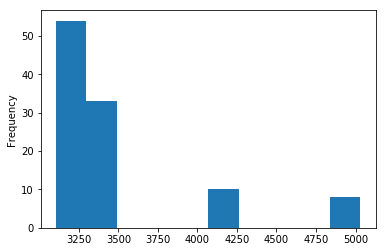

In [66]:
pd.Series(X_test_final[preds_IF == -1].time_stamp).plot.hist()

In [265]:
detected_anoma_ = X_test[X_test.time_stamp_seconds.isin(X_test_final[preds_IF == -1].time_stamp)]

In [278]:
X_test_final[preds_IF == -1].time_stamp.to_csv("time_point_syn_portscan.csv")

In [277]:
detected_anoma_.to_csv("detected_anomaly_syn_portscan.csv")

In [138]:
detected_anoma = pd.read_csv('detected_anomaly_syn_portscan.csv')

/usr/lib/python3/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [142]:
detected_anoma = detected_anoma.drop(['Unnamed: 0'], axis = 1)

In [143]:
detected_anoma.src_ip.value_counts().head()

192.168.10.50      102013
13.58.146.190       34293
107.22.224.100      19516
151.101.192.194      9690
104.97.137.26        9264
Name: src_ip, dtype: int64

In [144]:
detected_anoma.dst_port.value_counts()

443      10338
80        3250
53        2930
56734     1239
59328     1012
37796     1007
49008     1002
42254     1002
36894     1002
59478     1001
39070     1001
33830     1001
45002     1001
60768     1001
36448     1000
34110     1000
48354     1000
48416     1000
52332     1000
42668      999
58812      999
53430      998
64231      998
51546      998
56383      997
34497      997
51903      997
46785      997
35609      997
49025      997
         ...  
40260        1
46136        1
50900        1
60135        1
57938        1
38658        1
61267        1
62426        1
34900        1
60519        1
32836        1
53720        1
39696        1
53290        1
47360        1
62211        1
43432        1
34622        1
62108        1
60861        1
61045        1
35288        1
61904        1
53606        1
61073        1
49630        1
39826        1
53072        1
39036        1
35114        1
Name: dst_port, Length: 17570, dtype: int64

In [145]:
detected_anoma

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,time_stamp_seconds,local_time
0,903681196,A,3854810758,256,172.217.10.98,80,41,TCP,192.168.10.15,56561,1.499450e+09,192.168.10.15->172.217.10.98,2269.048239,9.649640e+00,3105,"2017-07-07, 17:51:45"
1,3984711052,A,2767161141,64165,69.169.85.6,80,41,TCP,192.168.10.15,56627,1.499450e+09,192.168.10.15->69.169.85.6,1450.447348,1.002269e+01,3105,"2017-07-07, 17:51:45"
2,2115610917,PA,1169194144,258,216.58.219.206,443,86,TCP,192.168.10.14,57152,1.499450e+09,192.168.10.14->216.58.219.206,71.073675,5.814815e+01,3105,"2017-07-07, 17:51:45"
3,2767161142,A,3984711052,4644,192.168.10.15,56627,40,TCP,69.169.85.6,80,1.499450e+09,69.169.85.6->192.168.10.15,1451.795271,1.002255e+01,3105,"2017-07-07, 17:51:45"
4,3854810759,A,903681196,356,192.168.10.15,56561,52,TCP,172.217.10.98,80,1.499450e+09,172.217.10.98->192.168.10.15,2282.069864,9.648979e+00,3105,"2017-07-07, 17:51:45"
5,1169194190,A,2115610917,791,192.168.10.14,57152,40,TCP,216.58.219.206,443,1.499450e+09,216.58.219.206->192.168.10.14,60.964078,5.810819e+01,3105,"2017-07-07, 17:51:45"
6,1169194190,PA,2115610917,791,192.168.10.14,57152,86,TCP,216.58.219.206,443,1.499450e+09,216.58.219.206->192.168.10.14,60.964078,2.861023e-06,3105,"2017-07-07, 17:51:45"
7,2575031658,A,2965024935,251,54.87.213.223,443,41,TCP,192.168.10.14,57079,1.499450e+09,192.168.10.14->54.87.213.223,466.673847,9.975084e+00,3105,"2017-07-07, 17:51:45"
8,2115610963,A,1169194190,258,216.58.219.206,443,40,TCP,192.168.10.14,57152,1.499450e+09,192.168.10.14->216.58.219.206,71.073675,8.835292e-02,3105,"2017-07-07, 17:51:45"
9,2965024936,A,2575031658,361,192.168.10.14,57079,52,TCP,54.87.213.223,443,1.499450e+09,54.87.213.223->192.168.10.14,464.739433,1.004649e+01,3105,"2017-07-07, 17:51:45"


In [286]:
detected_anoma.time_stamp = detected_anoma.time_stamp + min_time_sec

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [287]:
detected_anoma

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,dst_ip_internal,src_ip_internal
574752,903681196,A,3854810758,256,172.217.10.98,80,41,TCP,192.168.10.15,80,1499449905,192.168.10.15->172.217.10.98,2269.048239,9.649640e+00,0,1
574753,3984711052,A,2767161141,64165,69.169.85.6,80,41,TCP,192.168.10.15,80,1499449905,192.168.10.15->69.169.85.6,1450.447348,1.002269e+01,0,1
574754,2115610917,PA,1169194144,258,216.58.219.206,443,86,TCP,192.168.10.14,443,1499449905,192.168.10.14->216.58.219.206,71.073675,5.814815e+01,0,1
574755,2767161142,A,3984711052,4644,192.168.10.15,56627,40,TCP,69.169.85.6,56627,1499449905,69.169.85.6->192.168.10.15,1451.795271,1.002255e+01,1,0
574756,3854810759,A,903681196,356,192.168.10.15,56561,52,TCP,172.217.10.98,56561,1499449905,172.217.10.98->192.168.10.15,2282.069864,9.648979e+00,1,0
574757,1169194190,A,2115610917,791,192.168.10.14,57152,40,TCP,216.58.219.206,57152,1499449905,216.58.219.206->192.168.10.14,60.964078,5.810819e+01,1,0
574758,1169194190,PA,2115610917,791,192.168.10.14,57152,86,TCP,216.58.219.206,57152,1499449905,216.58.219.206->192.168.10.14,60.964078,2.861023e-06,1,0
574759,2575031658,A,2965024935,251,54.87.213.223,443,41,TCP,192.168.10.14,443,1499449905,192.168.10.14->54.87.213.223,466.673847,9.975084e+00,0,1
574760,2115610963,A,1169194190,258,216.58.219.206,443,40,TCP,192.168.10.14,443,1499449905,192.168.10.14->216.58.219.206,71.073675,8.835292e-02,0,1
574761,2965024936,A,2575031658,361,192.168.10.14,57079,52,TCP,54.87.213.223,57079,1499449905,54.87.213.223->192.168.10.14,464.739433,1.004649e+01,1,0


In [158]:
detected_anoma.TCP_flag.value_counts()

S        101911
RA       100874
A         20947
PA         7778
OTHER      5852
SA         1316
FA          877
R           282
FPA          35
Name: TCP_flag, dtype: int64

In [188]:
detected_anoma.src_ip.value_counts()

192.168.10.50      101898
13.58.146.190       34190
107.22.224.100      19423
151.101.192.194      9618
104.97.137.26        9540
13.59.43.55          7733
146.20.128.223       6751
146.20.128.189       5677
192.168.10.15        5281
162.242.240.67       4907
169.54.33.166        4008
192.168.10.3         2791
192.168.10.5         2754
192.168.10.16        2419
192.168.10.12        2212
192.168.10.14        1911
192.33.31.192        1230
104.20.93.15         1130
104.16.251.39        1114
192.168.10.17        1078
107.154.79.224        854
192.168.10.8          639
151.101.2.59          567
192.168.10.1          498
104.20.105.11         430
52.84.145.156         391
23.194.141.210        374
192.168.10.9          370
23.46.187.179         308
172.217.6.226         279
                    ...  
104.27.143.149          1
52.10.154.150           1
142.0.160.50            1
104.16.122.175          1
23.199.203.113          1
34.210.63.234           1
23.194.140.85           1
172.217.6.20

In [20]:
def search_ip(df, ip):
    return df[(df.dst_ip == ip)|(df.src_ip == ip)]

In [178]:
search_ip(detected_anoma, '13.58.146.190')

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,dst_ip_internal,src_ip_internal
579082,0,S,3869476526,1024,192.168.10.50,554,44,TCP,13.58.146.190,554,3108,13.58.146.190->192.168.10.50,2244.948699,1.271881,1,0
579083,0,S,3869476526,1024,192.168.10.50,1723,44,TCP,13.58.146.190,1723,3108,13.58.146.190->192.168.10.50,2244.948699,0.000003,1,0
579084,0,S,3869476526,1024,192.168.10.50,256,44,TCP,13.58.146.190,256,3108,13.58.146.190->192.168.10.50,2244.948699,0.000012,1,0
579085,0,S,3869476526,1024,192.168.10.50,995,44,TCP,13.58.146.190,995,3108,13.58.146.190->192.168.10.50,2244.948699,0.000053,1,0
579086,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,3108,192.168.10.50->13.58.146.190,2197.965286,1.271967,0,1
579087,0,S,3869476526,1024,192.168.10.50,1025,44,TCP,13.58.146.190,1025,3108,13.58.146.190->192.168.10.50,2244.948699,0.000067,1,0
579088,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,3108,192.168.10.50->13.58.146.190,2197.965286,0.000009,0,1
579089,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,3108,192.168.10.50->13.58.146.190,2197.965286,0.000015,0,1
579090,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,3108,192.168.10.50->13.58.146.190,2197.965286,0.000000,0,1
579091,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,3108,192.168.10.50->13.58.146.190,2197.965286,0.000000,0,1


In [175]:
search_ip(detected_anoma, '13.58.146.190').TCP_flag.value_counts()

S        33945
RA       33850
SA         157
A           88
R           69
OTHER       22
Name: TCP_flag, dtype: int64

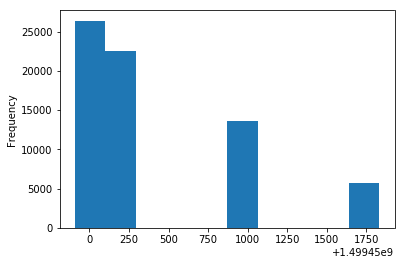

In [306]:
search_ip(detected_anoma, '13.58.146.190').time_stamp.plot.hist()

In [184]:
search_ip(detected_anoma, '13.58.146.190').protocol.value_counts()

TCP     68109
ICMP       22
Name: protocol, dtype: int64

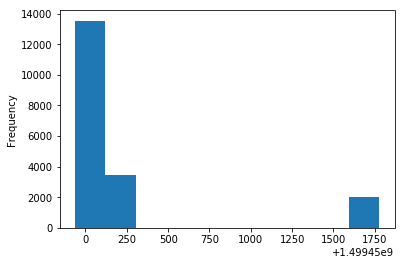

In [307]:
search_ip(detected_anoma, '104.97.137.26').time_stamp.plot.hist()

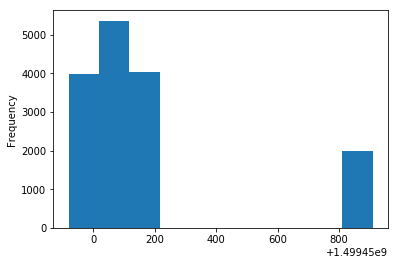

In [305]:
search_ip(detected_anoma, '13.59.43.55').time_stamp.plot.hist()

In [180]:
search_ip(detected_anoma, '107.22.224.100').TCP_flag.value_counts()

S        19277
RA       19215
SA          97
R           50
A           48
OTHER       14
Name: TCP_flag, dtype: int64

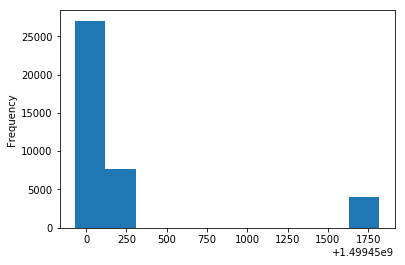

In [300]:
search_ip(detected_anoma, '107.22.224.100').time_stamp.plot.hist()

In [292]:
time.strftime('%Y-%m-%d, %H:%M:%S', time.localtime(search_ip(detected_anoma, '107.22.224.100').time_stamp.iloc[0]))

'2017-07-07, 17:52:11'

In [293]:
time.strftime('%Y-%m-%d, %H:%M:%S', time.localtime(search_ip(detected_anoma, '107.22.224.100').time_stamp.iloc[0] + 270))

'2017-07-07, 17:56:41'

In [294]:
time.strftime('%Y-%m-%d, %H:%M:%S', time.localtime(search_ip(detected_anoma, '107.22.224.100').time_stamp.iloc[0] + 1680))

'2017-07-07, 18:20:11'

In [299]:
time.strftime('%Y-%m-%d, %H:%M:%S', time.localtime(search_ip(detected_anoma, '107.22.224.100').time_stamp.iloc[0] + 1780))

'2017-07-07, 18:21:51'

In [183]:
search_ip(detected_anoma, '107.22.224.100').protocol.value_counts()

TCP     38687
ICMP       14
Name: protocol, dtype: int64

In [185]:
search_ip(detected_anoma,'151.101.192.194').protocol.value_counts()

TCP     19163
ICMP        7
Name: protocol, dtype: int64

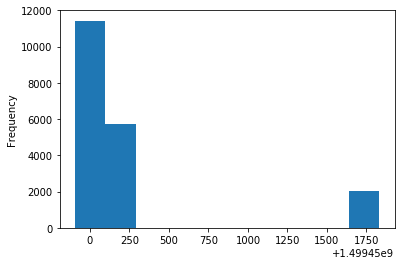

In [308]:
search_ip(detected_anoma,'151.101.192.194').time_stamp.plot.hist()

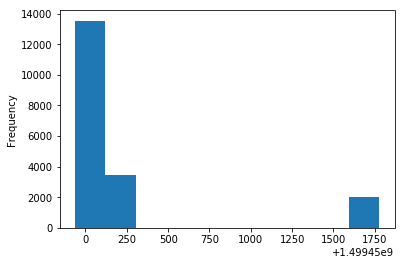

In [304]:
search_ip(detected_anoma,'104.97.137.26').time_stamp.plot.hist()

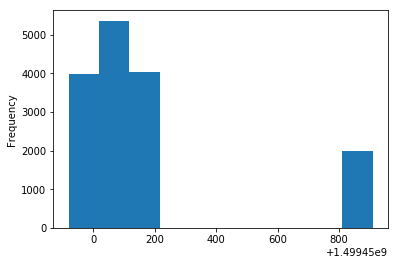

In [303]:
search_ip(detected_anoma,'13.59.43.55').time_stamp.plot.hist()

In [190]:
search_ip(detected_anoma,'13.59.43.55').TCP_flag.value_counts()

S        7674
RA       7651
SA         37
A          22
R          15
OTHER       8
Name: TCP_flag, dtype: int64

In [242]:
search_ip(X_test,'13.59.43.55')[search_ip(X_test,'13.59.43.55').src_port == 52332]

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,dst_ip_internal,src_ip_internal
611684,741325281,RA,0,0,13.59.43.55,52332,40,TCP,192.168.10.50,52332,3130,192.168.10.50->13.59.43.55,1607.245767,9.511415e+00,0,1
611685,741325281,RA,0,0,13.59.43.55,52332,40,TCP,192.168.10.50,52332,3130,192.168.10.50->13.59.43.55,1607.245767,6.914139e-06,0,1
611687,741325281,RA,0,0,13.59.43.55,52332,40,TCP,192.168.10.50,52332,3130,192.168.10.50->13.59.43.55,1607.245767,4.911423e-05,0,1
611688,741325281,SA,2490220845,29200,13.59.43.55,52332,44,TCP,192.168.10.50,52332,3130,192.168.10.50->13.59.43.55,1607.245767,9.059906e-06,0,1
611690,741325281,RA,0,0,13.59.43.55,52332,40,TCP,192.168.10.50,52332,3130,192.168.10.50->13.59.43.55,1607.245767,7.867813e-06,0,1
611692,741325281,RA,0,0,13.59.43.55,52332,40,TCP,192.168.10.50,52332,3130,192.168.10.50->13.59.43.55,1607.245767,8.106232e-06,0,1
611693,741325281,RA,0,0,13.59.43.55,52332,40,TCP,192.168.10.50,52332,3130,192.168.10.50->13.59.43.55,1607.245767,4.601479e-05,0,1
611695,741325281,RA,0,0,13.59.43.55,52332,40,TCP,192.168.10.50,52332,3130,192.168.10.50->13.59.43.55,1607.245767,5.006790e-06,0,1
611697,741325281,RA,0,0,13.59.43.55,52332,40,TCP,192.168.10.50,52332,3130,192.168.10.50->13.59.43.55,1607.245767,4.100800e-05,0,1
611698,741325281,RA,0,0,13.59.43.55,52332,40,TCP,192.168.10.50,52332,3130,192.168.10.50->13.59.43.55,1607.245767,3.695488e-05,0,1


In [200]:
search_ip(detected_anoma,'169.54.33.166').TCP_flag.value_counts()

S        3988
RA       3965
SA         20
R          20
OTHER       3
Name: TCP_flag, dtype: int64

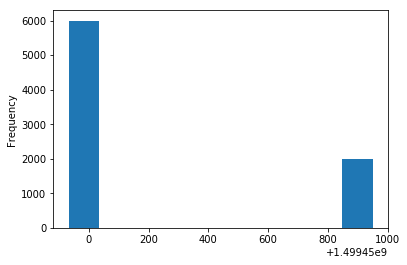

In [302]:
search_ip(detected_anoma,'169.54.33.166').time_stamp.plot.hist()

In [203]:
# the last attacker IP address
search_ip(detected_anoma,'169.54.33.166').protocol.value_counts()

TCP     7993
ICMP       3
Name: protocol, dtype: int64

# attack ip : 
13.58.146.190       34190
107.22.224.100      19423
151.101.192.194      9618
104.97.137.26        9540
13.59.43.55          7733
146.20.128.223       6751
146.20.128.189       5677
192.168.10.15        5281
162.242.240.67       4907
169.54.33.166        4008

In [137]:
attack_ips = ['13.58.146.190','107.22.224.100','151.101.192.194','104.97.137.26','13.59.43.55','146.20.128.223','146.20.128.189','192.168.10.15','162.242.240.67','169.54.33.166']

In [149]:
test_df.time_stamp.iloc[0]

1499446800.014081

In [150]:
detected_anoma.time_stamp.min()

1499449905.029518

In [151]:
detected_anoma.time_stamp.max()

1499451831.9999778

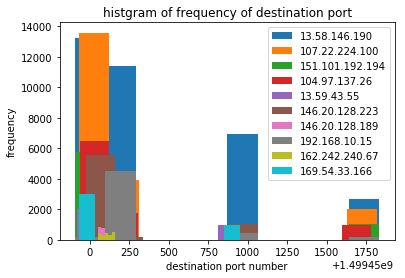

In [146]:
fig, ax = plt.subplots()
for i in range(len(attack_ips)):
    #search_ip(detected_anoma,attack_ips[i]).time_stamp.plot.hist()
    ax.hist(search_ip(detected_anoma,attack_ips[i]).time_stamp, label=attack_ips[i])
ax.legend(bbox_to_anchor=(1,1))
plt.title(r'histgram of frequency of destination port')
plt.xlabel("destination port number")
plt.ylabel("frequency")
plt.savefig("hist of anomaly", pli = 500)

In [237]:
search_ip(X_test, '146.20.128.223')[search_ip(X_test, '146.20.128.223').time_stamp>7710][100:].TCP_flag.value_counts()

A      38478
PA      7624
RA      5000
SA      4981
S       4981
FA      3804
FPA     2587
Name: TCP_flag, dtype: int64

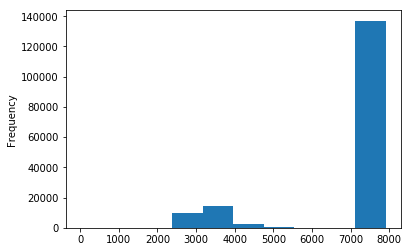

In [221]:
search_ip(X_test, '146.20.128.223').time_stamp.plot.hist()

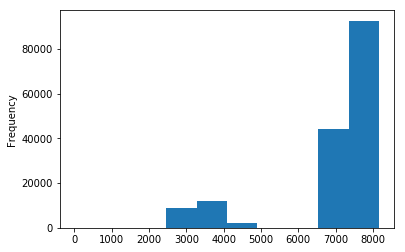

In [220]:
search_ip(X_test, '13.59.43.55').time_stamp.plot.hist()

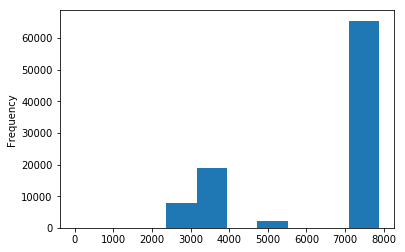

In [219]:
search_ip(X_test, '104.97.137.26').time_stamp.plot.hist()

In [217]:
search_ip(X_test, '151.101.192.194').protocol.value_counts()

TCP      162963
ICMP         12
OTHER         4
UDP           2
Name: protocol, dtype: int64

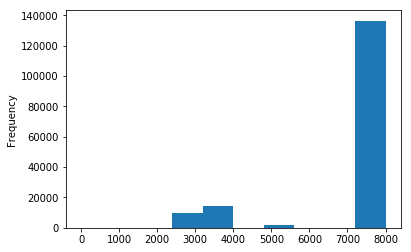

In [215]:
search_ip(X_test, '151.101.192.194').time_stamp.plot.hist()

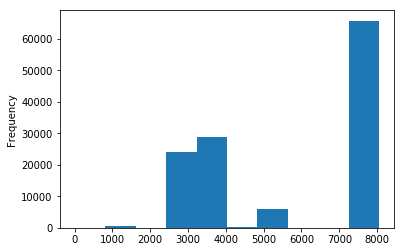

In [216]:
search_ip(X_test, '107.22.224.100').time_stamp.plot.hist()

In [210]:
search_ip(X_test, '107.22.224.100').TCP_flag.value_counts()

A        37188
S        34386
RA       34260
PA        7716
SA        5211
FA        3832
FPA       2595
OTHER      340
R           79
Name: TCP_flag, dtype: int64

In [153]:
X_test_final[preds_IF == -1].time_stamp

3081    3105
3084    3108
3086    3110
3096    3120
3101    3126
3105    3130
3106    3131
3107    3132
3109    3134
3110    3135
3111    3136
3112    3137
3116    3141
3117    3142
3118    3143
3120    3145
3122    3147
3125    3150
3131    3156
3132    3157
3133    3158
3135    3160
3138    3163
3140    3165
3144    3169
3145    3171
3148    3174
3149    3175
3152    3178
3153    3179
        ... 
3315    3341
3317    3343
3318    3344
3319    3345
3321    3347
3322    3348
3323    3349
3325    3351
3326    3352
3327    3353
3331    3357
3334    3360
4053    4081
4068    4096
4082    4110
4096    4124
4109    4137
4123    4151
4150    4178
4164    4192
4178    4206
4192    4220
4893    4922
4906    4935
4907    4936
4934    4963
4948    4977
4961    4990
4989    5018
5002    5031
Name: time_stamp, Length: 105, dtype: int64

In [69]:
IF.fit(X_train_final)
preds_IF_2 = pd.Series(IF.predict(X_test_final))

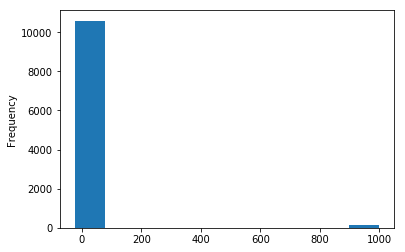

In [93]:
X_test_final.S_A.plot.hist()

In [73]:
X_test_final[preds_IF_2 == -1].head()

,time_stamp,count,S_A
3,3,106.0,4.0
10,10,53.0,6.0
11,11,99.0,5.0
29,29,328.0,3.0
41,41,675.0,-2.0


In [133]:
import numpy as np
from sklearn import mixture
np.random.seed(1)
g = mixture.GaussianMixture(n_components=1, covariance_type = "full")
g.fit(X_train_final[['count', 'S_A']])

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [134]:
g.weights_

array([1.])

In [135]:
res_ = pd.Series(g.predict_proba(X_test_final[['count', 'S_A']]).reshape(1, -1)[0])

In [136]:
X_test_final[res_ < 0.00000001]

,time_stamp,count,S_A


In [143]:
from sklearn.svm import OneClassSVM
ocsvm = OneClassSVM(nu=0.01, kernel="rbf", gamma=1)

In [150]:
ocsvm = ocsvm.fit(X_train_final)
OCSVM_preds=pd.Series(ocsvm.predict(X_test_final))

In [151]:
X_test_final[OCSVM_preds == -1]

,time_stamp,count,S_A
0,0,225.0,0.0
1,1,97.0,0.0
2,2,56.0,2.0
3,3,106.0,4.0
4,4,61.0,2.0
5,5,51.0,1.0
6,6,110.0,0.0
7,7,47.0,1.0
8,8,44.0,1.0
9,9,94.0,0.0


In [27]:
time_stamp_index = time_aggre_test[time_aggre_test['S_A'] > 900].index

In [28]:
# trace back to original data
X_test[(X_test.time_stamp.isin(time_stamp_index))][-1000:]

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,dst_ip_internal,src_ip_internal
1293453,0,S,2492502249,1024,192.168.10.50,5004,44,TCP,107.22.224.100,5004,5018,107.22.224.100->192.168.10.50,2296.053968,3.385544e-05,1,0
1293454,2492502250,RA,0,0,107.22.224.100,36114,40,TCP,192.168.10.50,36114,5018,192.168.10.50->107.22.224.100,2314.621462,4.410744e-05,0,1
1293455,0,S,2492502249,1024,192.168.10.50,1521,44,TCP,107.22.224.100,1521,5018,107.22.224.100->192.168.10.50,2296.053968,2.098083e-05,1,0
1293456,2492502250,RA,0,0,107.22.224.100,36114,40,TCP,192.168.10.50,36114,5018,192.168.10.50->107.22.224.100,2314.621462,1.096725e-05,0,1
1293457,2492502250,RA,0,0,107.22.224.100,36114,40,TCP,192.168.10.50,36114,5018,192.168.10.50->107.22.224.100,2314.621462,4.196167e-05,0,1
1293458,0,S,2492502249,1024,192.168.10.50,497,44,TCP,107.22.224.100,497,5018,107.22.224.100->192.168.10.50,2296.053968,5.102158e-05,1,0
1293459,0,S,2492502249,1024,192.168.10.50,7512,44,TCP,107.22.224.100,7512,5018,107.22.224.100->192.168.10.50,2296.053968,3.004074e-05,1,0
1293460,2492502250,RA,0,0,107.22.224.100,36114,40,TCP,192.168.10.50,36114,5018,192.168.10.50->107.22.224.100,2314.621462,5.793571e-05,0,1
1293461,2492502250,RA,0,0,107.22.224.100,36114,40,TCP,192.168.10.50,36114,5018,192.168.10.50->107.22.224.100,2314.621462,2.193451e-05,0,1
1293462,0,S,2492502249,1024,192.168.10.50,2099,44,TCP,107.22.224.100,2099,5018,107.22.224.100->192.168.10.50,2296.053968,6.914139e-05,1,0


# The hugh difference between S and SA in time intervals between Training and Testing, by comparing the difference between top S and top SA, we choose the appropriate time interval 

In [57]:
print("Flag S top time_interval in training: ", time_aggre_train.TCP_flag_S.sort_values(ascending = False).head())
print("FLag SA top time_interval in training: ", time_aggre_train.TCP_flag_SA.sort_values(ascending = False).head())

Flag S top time_interval in training:  time_stamp
884     94.0
882     92.0
2382    92.0
1034    90.0
2383    90.0
Name: TCP_flag_S, dtype: float64
FLag SA top time_interval in training:  time_stamp
882     92.0
2382    91.0
1034    90.0
884     90.0
2383    89.0
Name: TCP_flag_SA, dtype: float64


In [58]:
print("Flag S top time_interval in testing: ", time_aggre_test.TCP_flag_S.sort_values(ascending = False).head()) 
print("Flag SA top time_interval in testing: ", time_aggre_test.TCP_flag_SA.sort_values(ascending = False).head()) 

Flag S top time_interval in testing:  time_stamp
4922    1063.0
3343    1043.0
3257    1035.0
3348    1031.0
4206    1030.0
Name: TCP_flag_S, dtype: float64
Flag SA top time_interval in testing:  time_stamp
7248    270.0
7932    264.0
8170    257.0
7596    245.0
7956    238.0
Name: TCP_flag_SA, dtype: float64


# Thence we make the difference of S and SA to be a new feature

In [59]:
time_aggre_train['S-SA'] = time_aggre_train.TCP_flag_S - time_aggre_train.TCP_flag_SA
time_aggre_test['S-SA'] = time_aggre_test.TCP_flag_S - time_aggre_test.TCP_flag_SA

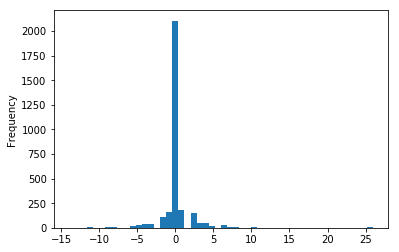

In [60]:
time_aggre_train['S-SA'].plot.hist(bins = 50)

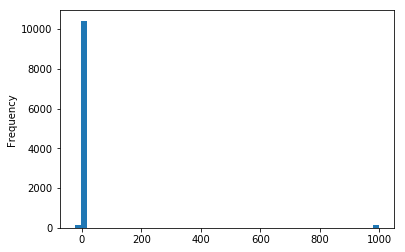

In [61]:
time_aggre_test['S-SA'].plot.hist(bins = 50)

In [77]:
list(time_aggre_test[time_aggre_test['S-SA'] > 200])

['dst_ip_internal',
 'src_ip_internal',
 'dst_port',
 'src_port',
 'packet_len',
 'time_stamp',
 'protocol_ICMP',
 'protocol_OTHER',
 'protocol_TCP',
 'protocol_UDP',
 'TCP_flag_A',
 'TCP_flag_FA',
 'TCP_flag_FAN',
 'TCP_flag_FPA',
 'TCP_flag_OTHER',
 'TCP_flag_PA',
 'TCP_flag_PAC',
 'TCP_flag_R',
 'TCP_flag_RA',
 'TCP_flag_S',
 'TCP_flag_SA',
 'TCP_flag_SAE',
 'TCP_flag_SEC',
 'S-SA']

In [80]:
time_stamps_ = time_aggre_test[time_aggre_test['S-SA'] > 200].index

In [82]:
X_test

,dst_ip_internal,src_ip_internal,dst_port,src_port,packet_len,protocol,TCP_flag,time_stamp
0,0,1,443,443,52,TCP,A,0
1,1,0,55848,55848,52,TCP,A,0
2,1,0,43060,43060,52,TCP,A,0
3,1,0,59225,59225,143,TCP,PA,0
4,0,1,443,443,52,TCP,A,0
5,0,1,443,443,249,TCP,PA,0
6,0,1,443,443,52,TCP,A,0
7,1,0,42918,42918,52,TCP,A,0
8,0,1,443,443,534,TCP,PA,0
9,1,0,59225,59225,52,TCP,A,0


In [81]:
time_aggre_test

,dst_ip_internal,src_ip_internal,dst_port,src_port,packet_len,time_stamp,protocol_ICMP,protocol_OTHER,protocol_TCP,protocol_UDP,...,TCP_flag_OTHER,TCP_flag_PA,TCP_flag_PAC,TCP_flag_R,TCP_flag_RA,TCP_flag_S,TCP_flag_SA,TCP_flag_SAE,TCP_flag_SEC,S-SA
time_stamp,,,,,,,,,,,,,,,,,,,,,
0,149,118,5832456,5832456,98726,0,0.0,0.0,195.0,30.0,...,30.0,66.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,0.0
1,51,46,1950283,1950283,5505,97,0.0,0.0,97.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31,25,1249805,1249805,2826,112,0.0,0.0,56.0,0.0,...,0.0,5.0,0.0,0.0,5.0,4.0,2.0,0.0,0.0,2.0
3,68,53,2088738,2088738,7062,318,0.0,0.0,91.0,15.0,...,15.0,11.0,0.0,2.0,7.0,5.0,1.0,0.0,0.0,4.0
4,34,27,1411437,1411437,2798,244,0.0,0.0,61.0,0.0,...,0.0,4.0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,2.0
5,28,23,961745,961745,2692,255,0.0,0.0,49.0,2.0,...,2.0,1.0,0.0,0.0,4.0,4.0,3.0,0.0,0.0,1.0
6,93,96,2596208,2596208,27001,660,0.0,0.0,110.0,0.0,...,0.0,36.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0
7,23,24,794498,794498,6068,329,0.0,0.0,47.0,0.0,...,0.0,9.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0
8,23,21,921162,921162,3462,352,0.0,0.0,44.0,0.0,...,0.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


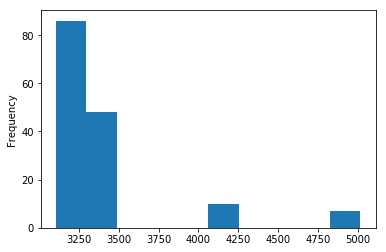

In [73]:
pd.Series(list(time_aggre_test[time_aggre_test['S-SA'] > 900].index)).plot.hist()

In [26]:
print(X_test.dst_port.value_counts().head())
print(X_train.dst_port.value_counts().head())

OTHER    1902541
HTTP      950406
HTTPS     554983
DNS       136978
SSH        17419
Name: dst_port, dtype: int64
OTHER    2672922
HTTP     1709888
HTTPS     322484
DNS        76977
SSH         4682
Name: dst_port, dtype: int64


In [18]:
X_test.dst_port = X_test.dst_port.astype(np.int64)
X_train.dst_port = X_train.dst_port.astype(np.int64)
X_test.src_port = X_test.src_port.astype(np.int64)
X_train.src_port = X_train.src_port.astype(np.int64)

In [26]:
#train tcp flag distribution
X_train.TCP_flag.value_counts()

A        4252769
PA        253385
OTHER     183604
FA         43000
S          23130
SA         22741
R           4141
RA          3172
FPA          999
SAE            6
SEC            6
Name: TCP_flag, dtype: int64

In [27]:
#test tcp flag distribution
X_test.TCP_flag.value_counts()

A        1858633
PA        526713
S         294333
OTHER     278280
RA        263477
FA        138669
SA        133352
FPA        51195
R          17561
SEC           41
PAC           40
SAE           31
FAN            2
Name: TCP_flag, dtype: int64

In [84]:
suspicious = X_test[(X_test.dst_ip_internal == 1)&(X_test.src_ip_internal == 0)&(X_test.TCP_flag == 'S')]

In [85]:
suspicious.src_ip.value_counts()

13.58.146.190      57994
107.22.224.100     34386
146.20.128.189     24313
146.20.128.223     23262
151.101.192.194    23215
13.59.43.55        21361
162.242.240.67     20342
104.97.137.26      19387
169.54.33.166      15437
104.16.26.35       10000
104.117.102.33      5910
Name: src_ip, dtype: int64

In [75]:
suspicious.src_ip.value_counts()

13.58.146.190      57994
107.22.224.100     34386
146.20.128.189     24313
146.20.128.223     23262
151.101.192.194    23215
13.59.43.55        21361
162.242.240.67     20342
104.97.137.26      19387
169.54.33.166      15437
104.16.26.35       10000
104.117.102.33      5910
Name: src_ip, dtype: int64

In [92]:
X_test[(X_test.src_ip == '13.58.146.190')|(X_test.dst_ip == '13.58.146.190')].to_csv("suspicious_attack.csv")

In [ ]:
mean_time_stamp = X_test.time_stamp - X_test.time_stamp.mean()
print(mean_time_stamp.max() - mean_time_stamp.min())
mean_time_stamp.plot.hist(bins = 30)

# ATTACK FOUND !!!!!!

In [101]:
#as we can see, huge amount of S and RA 
X_test[(X_test.src_ip == '13.58.146.190')|(X_test.dst_ip == '13.58.146.190')][3000:]

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,dst_ip_internal,src_ip_internal
579887,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,1.499450e+09,192.168.10.50->13.58.146.190,2197.965286,8.106232e-05,0,1
579888,0,S,3869476526,1024,192.168.10.50,1352,44,TCP,13.58.146.190,1352,1.499450e+09,13.58.146.190->192.168.10.50,2244.948699,4.601479e-05,1,0
579889,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,1.499450e+09,192.168.10.50->13.58.146.190,2197.965286,1.502037e-05,0,1
579890,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,1.499450e+09,192.168.10.50->13.58.146.190,2197.965286,2.479553e-05,0,1
579891,0,S,3869476526,1024,192.168.10.50,28201,44,TCP,13.58.146.190,28201,1.499450e+09,13.58.146.190->192.168.10.50,2244.948699,3.290176e-05,1,0
579892,0,S,3869476526,1024,192.168.10.50,1095,44,TCP,13.58.146.190,1095,1.499450e+09,13.58.146.190->192.168.10.50,2244.948699,5.006790e-06,1,0
579893,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,1.499450e+09,192.168.10.50->13.58.146.190,2197.965286,5.412102e-05,0,1
579894,3869476527,RA,0,0,13.58.146.190,45002,40,TCP,192.168.10.50,45002,1.499450e+09,192.168.10.50->13.58.146.190,2197.965286,6.914139e-06,0,1
579895,0,S,3869476526,1024,192.168.10.50,119,44,TCP,13.58.146.190,119,1.499450e+09,13.58.146.190->192.168.10.50,2244.948699,5.197525e-05,1,0
579896,0,S,3869476526,1024,192.168.10.50,2160,44,TCP,13.58.146.190,2160,1.499450e+09,13.58.146.190->192.168.10.50,2244.948699,3.504753e-05,1,0


In [100]:
X_test[(X_test.src_ip == '13.58.146.190')|(X_test.dst_ip == '13.58.146.190')].TCP_flag.value_counts()

S        57994
RA       57764
A        47514
PA        9841
SA        6660
FA        4976
FPA       3217
R          121
OTHER      100
Name: TCP_flag, dtype: int64

In [76]:
SA_suspicious = X_test[(X_test.dst_ip_internal == 0)&(X_test.src_ip_internal == 1)&(X_test.TCP_flag == 'SA')]

In [86]:
SA_suspicious.dst_ip.value_counts()

162.242.240.67     12486
169.54.33.166      10475
146.20.128.189     10315
146.20.128.223     10238
13.59.43.55        10220
151.101.192.194    10168
104.16.26.35       10000
13.58.146.190       6660
104.117.102.33      5910
107.22.224.100      5211
104.97.137.26       5078
Name: dst_ip, dtype: int64

In [64]:
suspicious.TCP_window.value_counts()

8192    8519
Name: TCP_window, dtype: int64

In [67]:
X_test.TCP_window.value_counts()

256      687334
229      457331
0        279322
OTHER    278280
29200    205251
8192     119869
1024      80006
65535     39767
61        34352
258       31523
16425     26185
251       25353
255       21463
31        21260
253       18743
946       17462
123       17406
64240     16297
254       15639
237       15426
360       15150
672       14803
252       14485
343       14093
245       12617
33        12362
62        12064
32        11902
980       11732
119       10716
          ...  
23396         1
10887         1
41617         1
42097         1
14822         1
8614          1
63512         1
32056         1
31381         1
48381         1
56360         1
7263          1
56880         1
45480         1
39578         1
12979         1
62657         1
30567         1
10339         1
42981         1
26070         1
18824         1
20874         1
11335         1
34395         1
11220         1
10579         1
10588         1
34415         1
8007          1
Name: TCP_window, Length

In [99]:
X_test.time_stamp.max()-X_test.time_stamp.min()

10961.15502691269

In [61]:
test_time_stamp = suspicious.time_stamp

In [58]:
test_time_stamp.min()

1499453806.757226

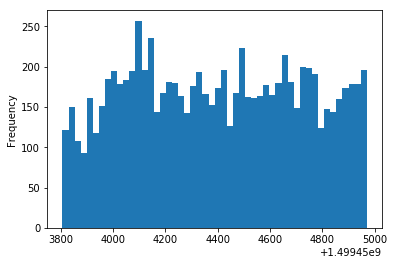

In [57]:
test_time_stamp.plot.hist(bins = 50)

In [59]:
X_test.time_stamp.min()

1499446800.014081

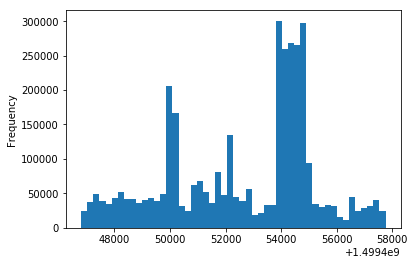

In [56]:
X_test.time_stamp.max()-X_test.time_stamp

In [27]:
train_dst_fre = X_train[(X_train.dst_ip_internal == 0) & (X_train.src_ip_internal == 1)].dst_port.value_counts()
test_dst_fre = X_test[(X_test.dst_ip_internal == 0) & (X_test.src_ip_internal == 1)].dst_port.value_counts()

In [14]:
#train_dst_fre

In [15]:
#train_dst_fre

In [20]:
test_dst_fre.head()

80       764966
7923       3640
9416       2951
10286      2886
56508      2724
Name: dst_port, dtype: int64

In [21]:
X_train.head()

,TCP_ack,TCP_flag,TCP_seq,TCP_window,dst_ip,dst_port,packet_len,protocol,src_ip,src_port,time_stamp,src_to_dst_ip,time_std,time_interval,dst_ip_internal,src_ip_internal
0,1220055066,A,3607095407,1021,192.168.10.14,51197,1500,TCP,13.107.4.50,80,1.499085e+09,13.107.4.50->192.168.10.14,8.627729,NaN,1,0
1,3607096867,A,1220055066,2075,13.107.4.50,80,40,TCP,192.168.10.14,51197,1.499085e+09,192.168.10.14->13.107.4.50,11.222483,NaN,0,1
2,1220055066,A,3607096867,1021,192.168.10.14,51197,1500,TCP,13.107.4.50,80,1.499085e+09,13.107.4.50->192.168.10.14,8.627729,0.000192,1,0
3,3607102707,A,1220055066,2081,13.107.4.50,80,40,TCP,192.168.10.14,51197,1.499085e+09,192.168.10.14->13.107.4.50,11.222483,0.000330,0,1
4,1220055066,A,3607098327,1021,192.168.10.14,51197,4420,TCP,13.107.4.50,80,1.499085e+09,13.107.4.50->192.168.10.14,8.627729,0.000193,1,0


In [16]:
#X_train[(X_train.dst_ip_internal == 1) & (X_train.src_ip_internal == 0)].dst_port.value_counts().head()

In [17]:
#X_train.dst_port.value_counts()

In [18]:
#X_test[(X_test.dst_ip_internal == 0) & (X_test.src_ip_internal == 1)].dst_port.value_counts().head()

In [24]:
#list(X_train_dummies)

In [25]:
#list(X_test_dummies)

In [26]:
X_test_dummies = X_test_dummies[list(X_train_dummies)]

In [27]:
X_test_dummies.shape

(3562327, 36)

In [32]:
X_train_dummies_ = X_train_dummies[(X_train_dummies.dst_ip_internal == 1)&(X_train_dummies.src_ip_internal == 0)]
X_test_dummies_ = X_test_dummies[(X_test_dummies.dst_ip_internal == 1)&(X_test_dummies.src_ip_internal == 0)]

In [34]:
X_train_dummies_.shape, X_test_dummies_.shape

((2566000, 36), (1778061, 36))

In [35]:
from sklearn.ensemble import IsolationForest
IF = IsolationForest(behaviour='new',contamination=0.01,random_state=42)

In [37]:
IF.fit(X_train_dummies_)

IsolationForest(behaviour='new', bootstrap=False, contamination=0.01,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

In [37]:
#X_train_preds = pd.Series(IF.predict(X_train_dummies))

In [41]:
#del X_train_preds

In [38]:
X_test_preds = pd.Series(IF.predict(X_test_dummies_))

In [50]:
X_test_preds.shape

(1778061,)

In [51]:
X_test_dummies_.shape

(1778061, 36)

In [55]:
X_test_dummies_ = X_test_dummies_.reset_index(drop = True)

In [74]:
X_test_dummies_[X_test_preds == 1].describe().to_csv("first_result_normal.csv")

In [75]:
X_test_dummies_[X_test_preds == -1].describe().to_csv("first_result_attack.csv")

In [63]:
X_test_dummies_[X_test_preds == -1].shape, X_test_dummies_[X_test_preds == 1].shape

((41035, 36), (1737026, 36))

In [67]:
X_test_dummies_[X_test_preds == 1]['TCP_flag_S'].value_counts()

0    1488311
1     248715
Name: TCP_flag_S, dtype: int64

In [66]:
X_test_dummies_[X_test_preds == -1]['TCP_flag_S'].value_counts()

0    34143
1     6892
Name: TCP_flag_S, dtype: int64

In [71]:
X_test_dummies_[X_test_preds == -1][X_test_dummies_[X_test_preds == -1].time_interval != -1]['dst_']

,TCP_ack,TCP_seq,TCP_window,packet_len,time_stamp,time_std,time_interval,dst_ip_internal,src_ip_internal,TCP_flag_A,...,protocol_ICMP,protocol_OTHER,protocol_TCP,protocol_UDP,src_port_DNS,src_port_FTP,src_port_HTTP,src_port_HTTPS,src_port_OTHER,src_port_SSH
212,0,2235330734,29200,60,1.499447e+09,1992.326914,2.501987,1,0,0,...,0,0,1,0,0,0,1,0,0,0
284,0,1245157454,29200,60,1.499447e+09,1992.326914,2.040226,1,0,0,...,0,0,1,0,0,0,0,1,0,0
285,0,1279379908,29200,60,1.499447e+09,2244.948699,3.340841,1,0,0,...,0,0,1,0,0,0,0,0,0,1
286,0,366517641,29200,60,1.499447e+09,2296.053968,0.737266,1,0,0,...,0,0,1,0,0,0,1,0,0,0
299,1195303898,3406426783,33580,40,1.499447e+09,2556.991941,2.003220,1,0,0,...,0,0,1,0,0,0,0,0,1,0
324,1748711763,2081167321,28960,60,1.499447e+09,3158.862252,6.851916,1,0,0,...,0,0,1,0,0,0,0,0,1,0
330,3446119118,1211415143,946,40,1.499447e+09,2739.945050,5.732016,1,0,0,...,0,0,1,0,0,0,0,0,1,0
337,0,1454513321,29200,60,1.499447e+09,2296.053968,2.501576,1,0,0,...,0,0,1,0,0,0,0,1,0,0
354,4243484714,1241013940,972,52,1.499447e+09,2990.006946,7.261380,1,0,0,...,0,0,1,0,0,0,0,0,1,0
419,0,910233234,29200,60,1.499447e+09,2296.053968,1.300965,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [73]:
import numpy as np
from sklearn import mixture
np.random.seed(1)
g = mixture.GaussianMixture(n_components=2, covariance_type = "full")
g.fit(X_train_dummies)

MemoryError: Unable to allocate array with shape (4786953, 36) and data type float64

In [32]:
#extract the messages that sent from external ip to internal ip
extracted_train = X_train[(X_train.dst_ip_internal == 1) & (X_train.src_ip_internal == 0)]
extracted_test = X_test[(X_test.dst_ip_internal == 1) & (X_test.src_ip_internal == 0)]

In [33]:
#map the source ip into its frequency in the whole dataset
train_srcip_fre_map = extracted_train.src_ip.value_counts()
test_srcip_fre_map = extracted_test.src_ip.value_counts()
extracted_train.src_ip = extracted_train.src_ip.map(train_srcip_fre_map)
extracted_test.src_ip = extracted_test.src_ip.map(test_srcip_fre_map)

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [34]:
extracted_train.src_ip = extracted_train.src_ip.astype(int)
extracted_test.src_ip = extracted_test.src_ip.astype(int)

/usr/lib/python3/dist-packages/pandas/core/generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [35]:
extracted_train.drop(["src_to_dst_ip", "dst_ip_internal", "src_ip_internal"], axis = 1, inplace = True)
extracted_test.drop(["src_to_dst_ip", "dst_ip_internal", "src_ip_internal"], axis = 1, inplace = True)

/usr/lib/python3/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [37]:
dst_ips = ['dst_ip_192.168.10.12','dst_ip_192.168.10.14','dst_ip_192.168.10.15','dst_ip_192.168.10.16', 'dst_ip_192.168.10.17', 'dst_ip_192.168.10.19', 'dst_ip_192.168.10.25', 'dst_ip_192.168.10.5', 'dst_ip_192.168.10.50', 'dst_ip_192.168.10.51', 'dst_ip_192.168.10.8','dst_ip_192.168.10.9']

In [40]:
dst_ips = extracted_train.dst_ip.value_counts().index

In [81]:
print(extracted_test[extracted_test.dst_ip == dst_ips[0]].shape[0]/extracted_test.shape[0])
extracted_train[extracted_train.dst_ip == dst_ips[0]].shape[0]/extracted_train.shape[0]

0.07581517169545926


0.7915198752922837

In [147]:
extracted_dummies_train = pd.get_dummies(extracted_train)
print(extracted_dummies_train[dst_ips].head())
#extract the dummies dfs for all dst ids
from sklearn.preprocessing import StandardScaler
train_dst_ips_ = [] 
for i in range(len(dst_ips)):
    #extract the corresponding df and drop other irrelevent columns
    train_dst_ips_.append(extracted_dummies_train[extracted_dummies_train[dst_ips[i]] == 1].drop(dst_ips, axis = 1).values)

sample_df = train_dst_ips_[2]

sample_df.shape

#calculate mean and covariance of this dataframe
def calculate_mean_covariance(df):
    length_ = df.shape[0]
    mu = np.mean(df, axis = 0)
    df = df - mu
    cov = (df.T @ df)/length_
    return mu, cov

mu, cov = calculate_mean_covariance(sample_df)

print("mu: ", mu)
print("covariance_matrix: ", cov)

# calculate the distribution of the test instance
def multi_gauss_prob(x_test, mu, cov):
    x_test = x_test - mu
    cov_mat_inv = np.linalg.pinv(cov)
    cov_mat_det = np.linalg.det(cov)
    n = cov.shape[0]
    return (np.exp(-0.5 * np.dot(x_test, np.dot(cov_mat_inv, x_test.T))) 
            / (2. * np.pi)**(n/2.) 
            / np.sqrt(cov_mat_det))

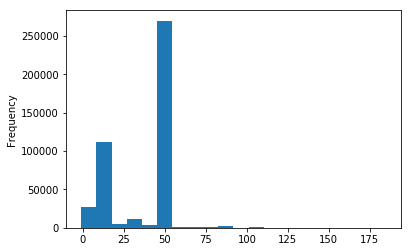

In [261]:
extracted_train.time_std.plot.hist(bins = 20)

In [144]:
extracted_train.TCP_flag.value_counts()

A        407033
PA        22232
SA         2858
FA         2761
OTHER       992
FPA          81
RA           60
R            47
Name: TCP_flag, dtype: int64

In [281]:
# percentage of internal destination ip 
X_test[X_test.dst_ip_internal == 1].dst_ip.shape[0]/X_test.shape[0]

0.6001212129038126

In [282]:
# it is interesting to note that there are only about 15 distinct internal ip
train_internal_ips = X_train[X_train.dst_ip_internal == 1].dst_ip.value_counts()
test_internal_ips = X_test[X_test.dst_ip_internal == 1].dst_ip.value_counts()
train_num_internal_ips = train_internal_ips.shape[0]
test_num_internal_ips = test_internal_ips.shape[0]

print("There are %d distinct internal ip address in train data"%train_num_internal_ips)
print("Which are:")
print(train_internal_ips)

print("There are %d distinct internal ip address in test data"%test_num_internal_ips)
print("Which are:")
print(test_internal_ips)

There are 15 distinct internal ip address in train data
Which are:
192.168.10.15     285254
192.168.10.14     112476
192.168.10.5       20129
192.168.10.3        8279
192.168.10.16       5473
192.168.10.12       5273
192.168.10.9        5264
192.168.10.25       3688
192.168.10.50       2291
192.168.10.17       1779
192.168.10.1        1257
192.168.10.51       1143
192.168.10.19        872
192.168.10.255       741
192.168.10.8         372
Name: dst_ip, dtype: int64
There are 15 distinct internal ip address in test data
Which are:
192.168.10.50     963632
192.168.10.15     155713
192.168.10.3      154234
192.168.10.8      123020
192.168.10.16     117191
192.168.10.5      106601
192.168.10.17     106521
192.168.10.12      92311
192.168.10.9       89714
192.168.10.14      77950
192.168.10.19      69900
192.168.10.25      46173
192.168.10.1       22855
192.168.10.255      7683
192.168.10.51       4330
Name: dst_ip, dtype: int64


In [271]:
#same internal ips in training and testing sets
set(train_internal_ips.index).difference(set(test_internal_ips.index))

set()

In [287]:
X_test[X_test.src_ip_internal == 1].src_ip.value_counts()

192.168.10.50    718636
192.168.10.15    145255
192.168.10.3     141771
192.168.10.8     105922
192.168.10.16    104610
192.168.10.17     98390
192.168.10.5      95890
192.168.10.12     86654
192.168.10.9      79363
192.168.10.14     74433
192.168.10.19     63472
192.168.10.25     43090
192.168.10.1      22855
192.168.10.51      3925
Name: src_ip, dtype: int64

In [299]:
X_test[(X_test.dst_ip == '192.168.10.3') & (X_test.flag == "S")].dst_port.value_counts()

389      276
88       144
3268     118
445      108
389       42
135       40
49666     38
445       34
3268      30
49671     16
135       10
49666     10
49671      4
88         2
Name: dst_port, dtype: int64